#### Summary 

In [1]:
import string
import collections
import random
import pandas as pd
import numpy as np 
import re
import unicodedata
import pickle
import warnings
import operator
import pyLDAvis.gensim as gensimvis
import pyLDAvis
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools
import lightgbm as lgbm
import prince
import nltk
import logging

from collections import Counter
from collections import defaultdict
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import cross_validation
from sklearn.model_selection import KFold # import KFold

from sklearn.pipeline import Pipeline
from sklearn.model_selection  import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVC
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from gensim.models import word2vec
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.linear_model import Ridge
from gensim.models import word2vec

from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from imblearn.under_sampling import ClusterCentroids
from sklearn import svm
from gensim.models import word2vec
from sklearn.ensemble import AdaBoostClassifier
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC

from wordcloud import WordCloud

from nltk import *
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import word_tokenize
from nltk.tokenize import *
from nltk.collocations import *

from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform as sp_rand
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from gensim.models import Word2Vec

from scipy.cluster import hierarchy
from scipy import ndimage
from scipy.misc import imread
from scipy import stats
from PIL import Image
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# from yelpapi import YelpAPI #External data source
# import facebook #External data source GraphAPI

# from functions import *


from sklearn import metrics
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import *
from nltk.stem.snowball import SnowballStemmer

from sklearn import ensemble
from sklearn.metrics import * 

%matplotlib inline
warnings.filterwarnings('ignore')


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\func_inspect.py:53: DeprecationWarning: invalid escape sequence \<
  '\<doctest (.*\.rst)\[(.*)\]\>', source_file).groups()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\_memory_helpers.py:10: DeprecationWarning: invalid escape sequence \s
  cookie_re = re.compile("coding[:=]\s*([-\w.]+)")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:349: DeprecationWarning: invalid escape sequence \k
  """
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:578: DeprecationWarning: invalid escape sequence \s
  """
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\nmf.py:972: DeprecationWarning: invalid escape sequence \s
  """
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\nmf.py:1186: DeprecationWarning: invalid escape sequence \s
  """
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.p

___
##### Sampling From Initial 1.4M Records

Echantillanage ! le format HDF (hierarchical data Format) est un format de stockage de donnès très rapide à la lecture et l'écriture.

____
##### Data Pre-processing : Removing outliers

_______
##### Uploading Used DataFrame : 

In [2]:
df = pd.read_hdf('../input/NoNaN100KRmOutliers.hdf',key="imsd")

df.reset_index(inplace=True,drop=True)
print("Shape : "+str(df.shape))

Shape : (127357, 7)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127357 entries, 0 to 127356
Data columns (total 7 columns):
name                 127357 non-null object
item_condition_id    127357 non-null int64
category_name        127357 non-null object
price                127357 non-null float64
shipping             127357 non-null int64
item_description     127357 non-null object
brand_name           127357 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 6.8+ MB


In [4]:
df.describe()

item_condition_id          price       shipping
count      127357.000000  127357.000000  127357.000000
mean            2.033646      30.277185       0.388381
std             0.905187      41.328897       0.487384
min             1.000000       3.000000       0.000000
25%             1.000000      12.000000       0.000000
50%             2.000000      20.000000       0.000000
75%             3.000000      34.000000       1.000000
max             5.000000    1700.000000       1.000000

____
###### Reducing Variabilities in the DataFrame :

In [5]:
#Reducing Diff NIKE == nike == Nike 
def treat(elt):
    if(isinstance(elt,str)):
        return elt.lower()
    return str(elt).lower()

#Eliminating Accents é == e | à == a
def harmonizeString(x):
    x = str(x)
    return ''.join((c for c in unicodedata.normalize('NFD', x) if unicodedata.category(c) != 'Mn'))
     

df["brand_name"] = df["brand_name"].apply(lambda x: np.NaN if(pd.isnull(x)) else treat(x))
df["category_name"] = df["category_name"].apply(lambda x: np.NaN if(pd.isnull(x)) else treat(x))
df["name"] = df["name"].apply(lambda x: np.NaN if(pd.isnull(x)) else treat(x))
df["item_description"] = df["item_description"].apply(lambda x: np.NaN if(pd.isnull(x)) else treat(x))

df["brand_name"] = df["brand_name"].apply(lambda x: np.NaN if(pd.isnull(x)) else harmonizeString(x))
df["category_name"] = df["category_name"].apply(lambda x: np.NaN if(pd.isnull(x)) else harmonizeString(x))
df["name"] = df["name"].apply(lambda x: np.NaN if(pd.isnull(x)) else harmonizeString(x))
df["item_description"] = df["item_description"].apply(lambda x: np.NaN if(pd.isnull(x)) else harmonizeString(x))

_____
##### Vizualisation 

In [6]:
def brandPlot(liste11):
    plt.figure(figsize=(20, 10))
    cpt=0
    liste1=liste11[:30]
    size = len(liste1[:30])
    x = [elt[0] for elt in liste1]
    for [xx,yy] in liste1:
        plt.barh(cpt, yy, align='center', alpha=0.5)
        cpt+=1    
    plt.yticks(range(0,size),x, fontsize=15)
    plt.xticks(fontsize=15)
    plt.title("Top 30 Brands sorted by its Article's Number ", fontsize=15)
    plt.xlabel('Count of articles', fontsize=15)
    plt.ylabel('Brand', fontsize=15)
    plt.legend(fontsize=15)
    plt.show()

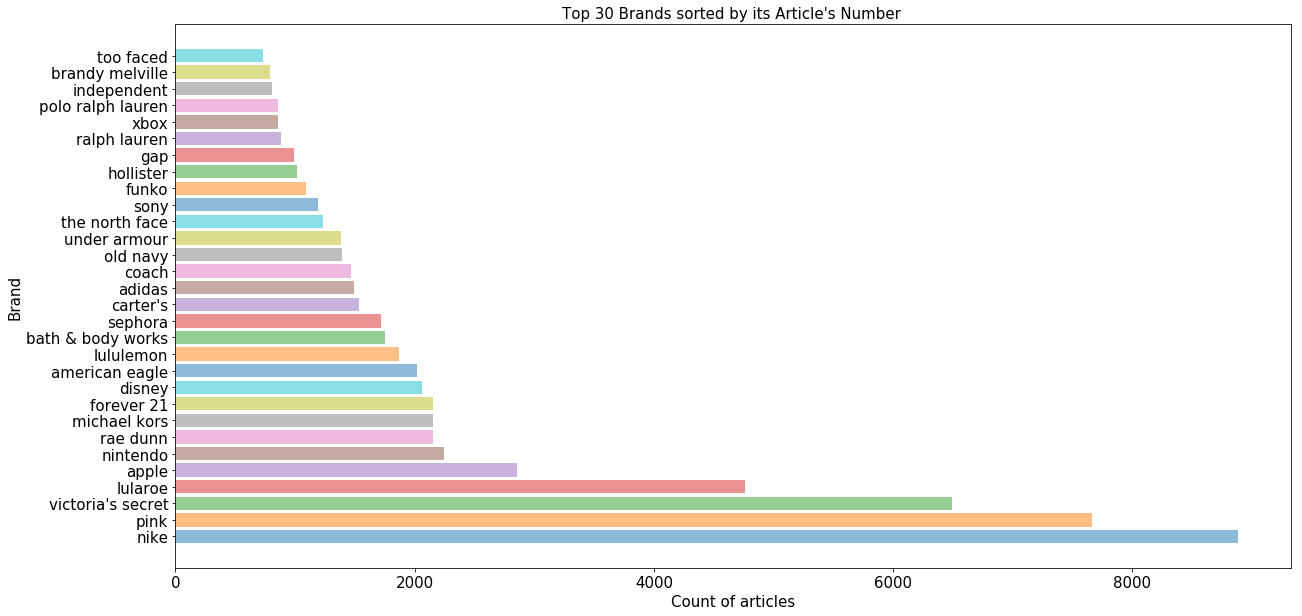

In [7]:
grouped_df = df.astype(str).groupby(["brand_name"])
grouped_df = pd.DataFrame(grouped_df.size().reset_index(name = "Group_Count"))
resultbrand = grouped_df.sort_values(by='Group_Count', ascending=False,na_position='first')
result = resultbrand[["brand_name","Group_Count"]].values.tolist()
brandPlot(result)
brandArticles = {}
for brand in result :
    brandArticles[brand[0]]=brand[1]
warnings.filterwarnings('ignore')

In [8]:
#Defining a function which will split into three features out categories
def transform_category_name(category_name):
    try:
        mainCategory, subCategory, subsubCategory = category_name.split('/')
        return mainCategory, subCategory, subsubCategory
    except:
        return np.nan, np.nan, np.nan

In [9]:
#Creating Three Columns with the corresponding values
df['category_main'], df['category_sub1'], df['category_sub2'] = zip(*df['category_name'].apply(transform_category_name))
df['descriptionLength'] = df['item_description'].apply(lambda x : len(str(x).split()))

In [10]:
def plotBarHDisctionnary(liste11,category):
    plt.figure(figsize=(15, 10))
    cpt=0
    liste1=liste11[:30]
    size = len(liste1[:30])
    x = [elt[0] for elt in liste1]
    for [xx,yy] in liste1:
        plt.barh(cpt, yy, align='center', alpha=0.5)
        cpt+=1    
    plt.yticks(range(0,size),x, fontsize=15)
    plt.xticks(fontsize=15)
    plt.title("Top 30 "+category+" categories sorted by its Article's Number ", fontsize=15)
    plt.xlabel('Count of articles', fontsize=15)
    plt.ylabel(category+' categorie', fontsize=15)
    plt.legend(fontsize=15)
    plt.show()

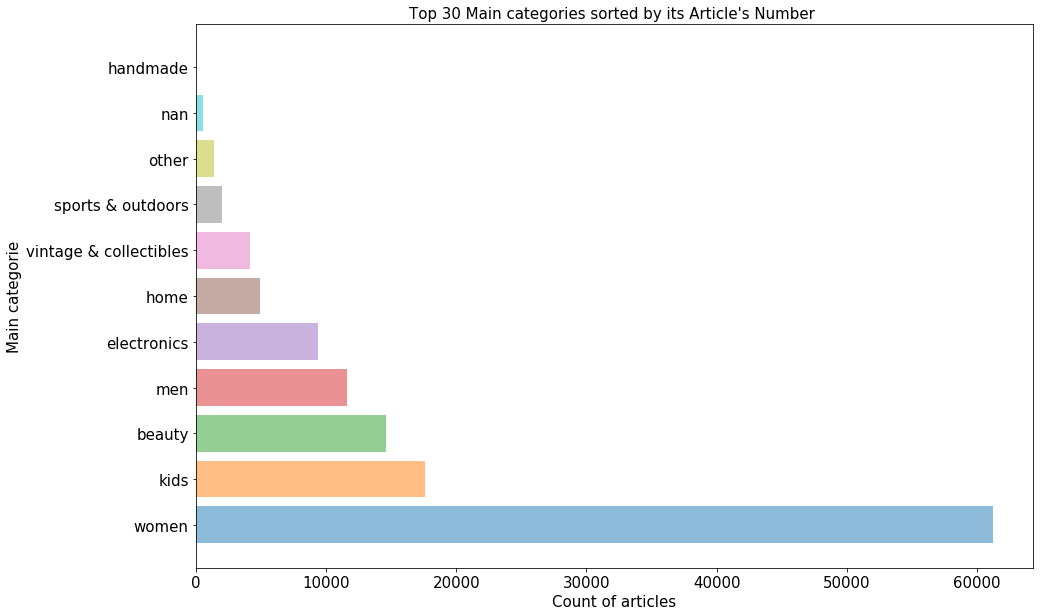

In [11]:
grouped_df = df.astype(str).groupby(["category_main"])
grouped_df = pd.DataFrame(grouped_df.size().reset_index(name = "Group_Count"))
result = grouped_df.sort_values(by='Group_Count', ascending=False,na_position='first')
resultMain = result[["category_main","Group_Count"]].values.tolist()
plotBarHDisctionnary(resultMain,'Main')

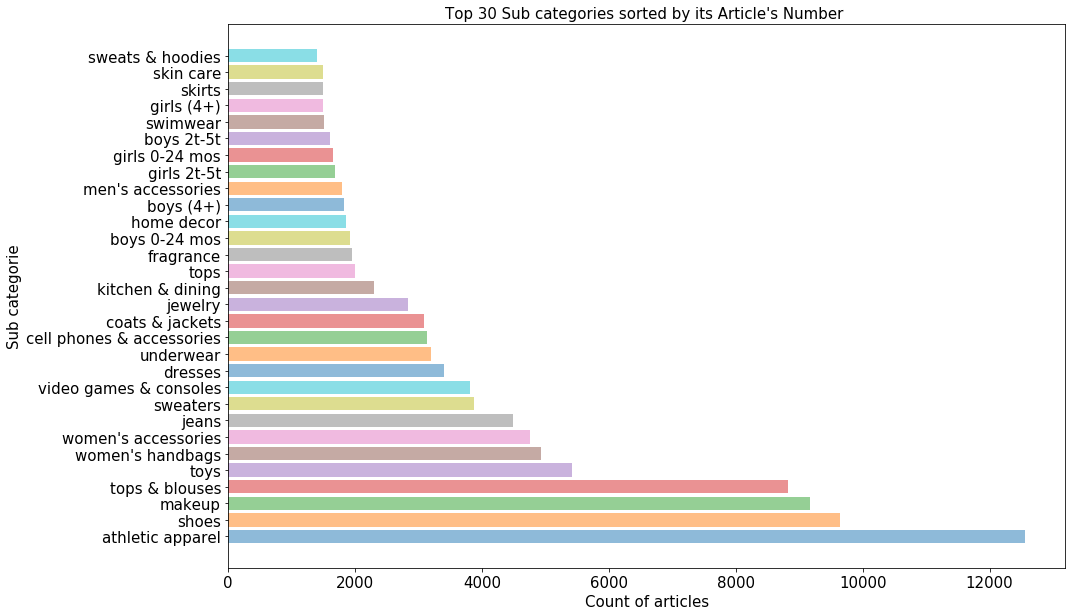

In [12]:
grouped_df = df.astype(str).groupby(["category_sub1"])
grouped_df = pd.DataFrame(grouped_df.size().reset_index(name = "Group_Count"))
result = grouped_df.sort_values(by='Group_Count', ascending=False,na_position='first')
resultSub = result[["category_sub1","Group_Count"]].values.tolist()
plotBarHDisctionnary(resultSub,'Sub')

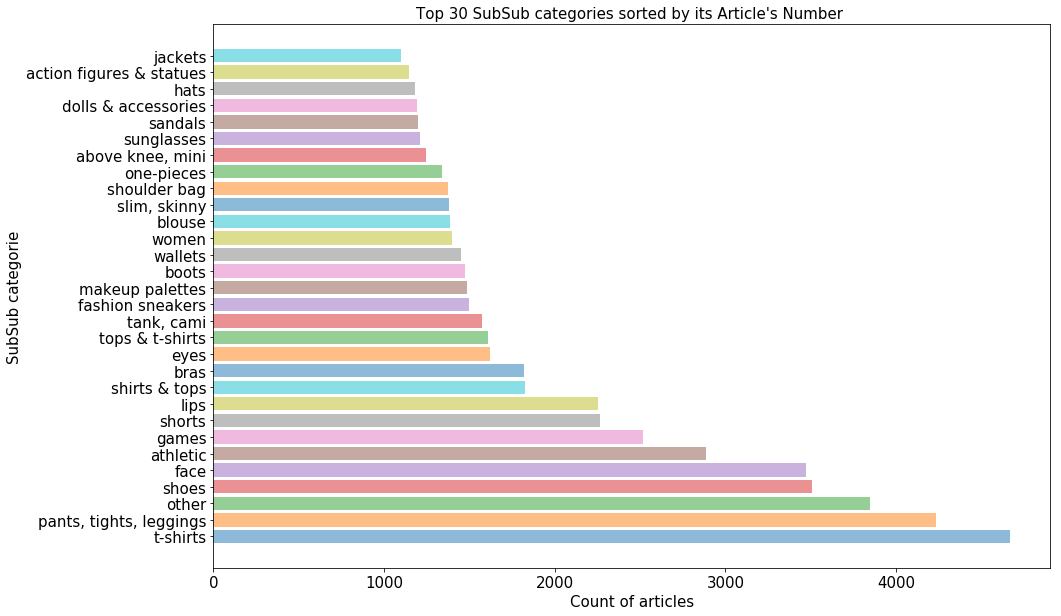

In [13]:
grouped_df = df.astype(str).groupby(["category_sub2"])
grouped_df = pd.DataFrame(grouped_df.size().reset_index(name = "Group_Count"))
result = grouped_df.sort_values(by='Group_Count', ascending=False,na_position='first')
resultSubSub = result[["category_sub2","Group_Count"]].values.tolist()
plotBarHDisctionnary(resultSubSub,'SubSub')

____
##### Statistic Tests : Dependency Between Features 
    - Shipping Impact On Price 

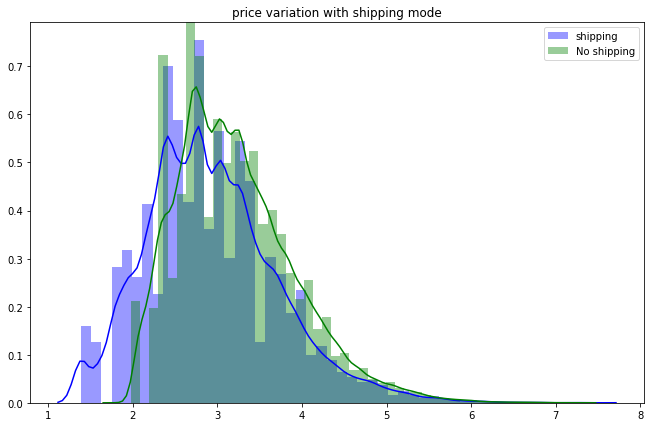

We have two normal Distribution so we can proceed a T-Test
H0 : ItemCondition Dosen't affect the price 
762.034431526 3.02760089076e-167
pvalue is less than  5% so we reject the nul Hypothesis


In [14]:
# Lets check if shipping has any impact on prices 
fig, ax = plt.subplots(figsize=(11, 7), sharex=True, sharey=True)
sns.distplot(np.log(df.loc[df['shipping']==1]['price'].values+1),  color='blue', label='shipping')
sns.distplot(np.log(df.loc[df['shipping']==0]['price'].values+1),  color='green', label='No shipping')
plt.title("price variation with shipping mode")
ax.legend(loc=0)
plt.show()

# H0 : ItemCondition Dosen't affect the price
print("We have two normal Distribution so we can proceed a T-Test")
print("H0 : ItemCondition Dosen't affect the price ")
Price1 = df[(df["shipping"] == 1)]["price"].values.tolist() 
Price2 = df[(df["shipping"] == 0)]["price"].values.tolist() 
stat, pvalue = stats.f_oneway(Price1, Price2)
print(stat, pvalue)
print("pvalue is less than  5% so we reject the nul Hypothesis")

    - Description Impact on the Price Field

In [15]:
df['no_description'] = [0]*df.shape[0]
df.loc[((df['item_description']=='no description yet') | df['item_description'].isnull()), 'no_description'] = 1

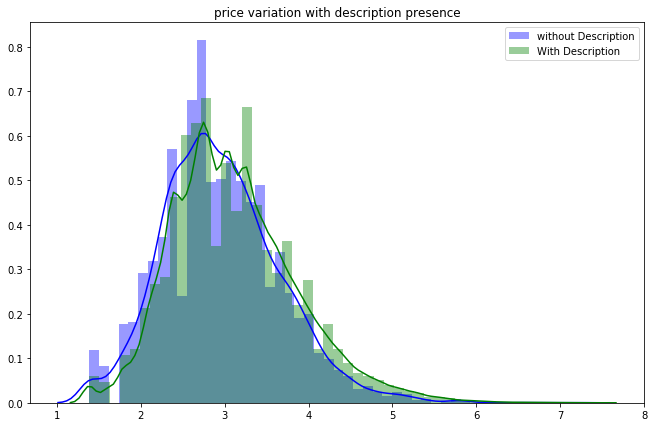

We have two normal Distribution so we can proceed a T-Test
H0 : Description's presence Dosen't affect the price 
121.666918497 2.81214352695e-28
pvalue is less than  5% so we reject the nul Hypothesis


In [16]:
# Lets check if shipping has any impact on prices 
fig, ax = plt.subplots(figsize=(11, 7), sharex=True, sharey=True)
sns.distplot(np.log(df.loc[df['no_description']==1]['price'].values+1),  color='blue', label='without Description')
sns.distplot(np.log(df.loc[df['no_description']==0]['price'].values+1),  color='green', label='With Description')
plt.title("price variation with description presence")
ax.legend(loc=0)
plt.show()

# H0 : Description's presence Dosen't affect the price
print("We have two normal Distribution so we can proceed a T-Test")
print("H0 : Description's presence Dosen't affect the price ")
Price1 = df[(df["no_description"] == 1)]["price"].values.tolist() 
Price2 = df[(df["no_description"] == 0)]["price"].values.tolist() 
stat, pvalue = stats.f_oneway(Price1, Price2)
print(stat, pvalue)
print("pvalue is less than  5% so we reject the nul Hypothesis")

    - Item Condition Impact on The Price Field

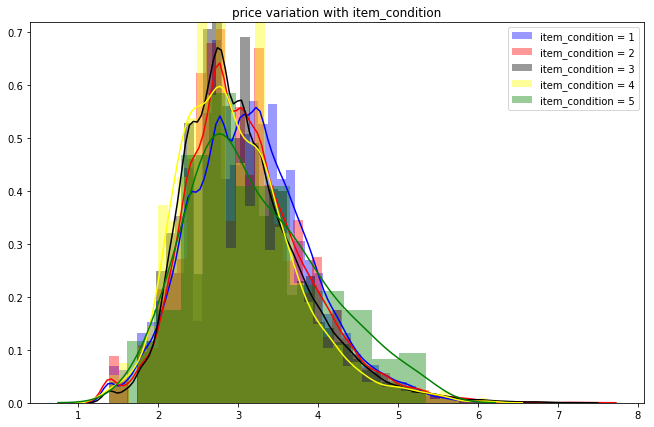

We have normal Distributions so we can proceed a T-Test
H0 : ItemCondition Dosen't affect the price 
20.3442372559 9.00759026418e-17
pvalue is less than  5% so we reject the nul Hypothesis


In [17]:
Price1 = df[(df["item_condition_id"] == 1)]["price"].values.tolist() 
Price2 = df[(df["item_condition_id"] == 2)]["price"].values.tolist() 
Price3 = df[(df["item_condition_id"] == 3)]["price"].values.tolist() 
Price4 = df[(df["item_condition_id"] == 4)]["price"].values.tolist() 
Price5 = df[(df["item_condition_id"] == 5)]["price"].values.tolist() 

# Lets check if shipping has any impact on prices 
fig, ax = plt.subplots(figsize=(11, 7), sharex=True, sharey=True)
sns.distplot(np.log(np.array(Price1)+1),  color='blue', label='item_condition = 1')
sns.distplot(np.log(np.array(Price2)+1),  color='red', label='item_condition = 2')
sns.distplot(np.log(np.array(Price3)+1),  color='black', label='item_condition = 3')
sns.distplot(np.log(np.array(Price4)+1),  color='yellow', label='item_condition = 4')
sns.distplot(np.log(np.array(Price5)+1),  color='green', label='item_condition = 5')
plt.title("price variation with item_condition")
ax.legend(loc=0)
plt.show()

# H0 : ItemCondition Dosen't affect the price
print("We have normal Distributions so we can proceed a T-Test")
print("H0 : ItemCondition Dosen't affect the price ")
stat, pvalue = stats.f_oneway(Price1, Price2,Price3,Price4,Price5)
print(stat, pvalue)
print("pvalue is less than  5% so we reject the nul Hypothesis")

____
##### Distribution Analysis by Shipping Mode

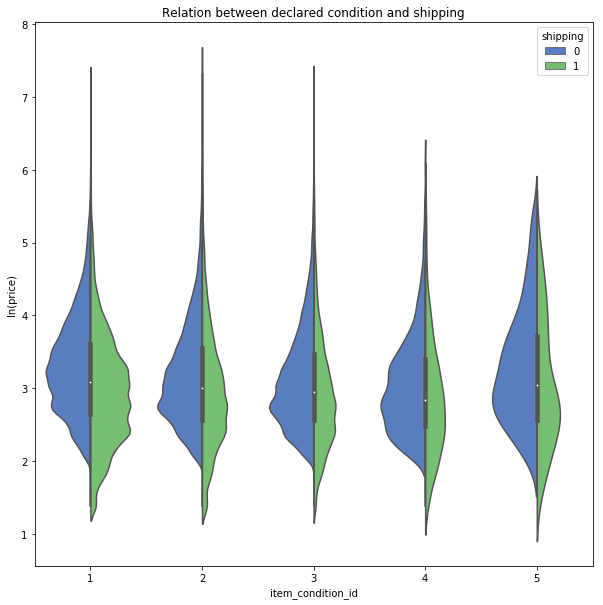

In [18]:
fig, ax = plt.subplots(figsize= (10,10))
plt.title('Relation between declared condition and shipping')
plt.xlabel("item's condition")
plt.ylabel('ln(price)')
ax = sns.violinplot(x="item_condition_id", y=np.log(df["price"].values+1), hue='shipping', data=df , scale="count", palette="muted", split=True, x_jitter = True, y_jitter = True)
plt.show()

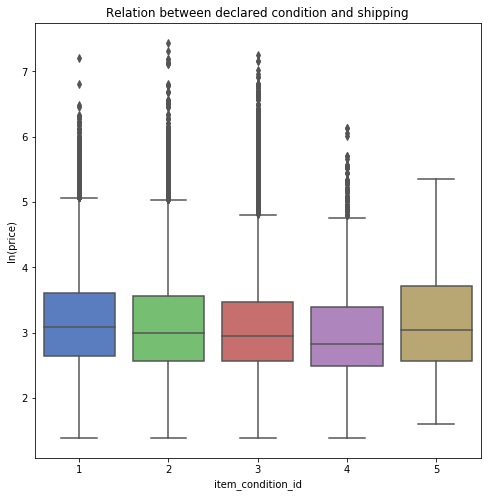

In [19]:
plt.close()
fig, ax = plt.subplots(figsize= (8,8))
plt.title('Relation between declared condition and shipping')
plt.xlabel("item's condition")
plt.ylabel('ln(price)')
ax = sns.boxplot(x="item_condition_id", y=np.log(df["price"].values+1), data=df, palette="muted")
plt.show()

____
##### Wordcloud - Text Frequency :

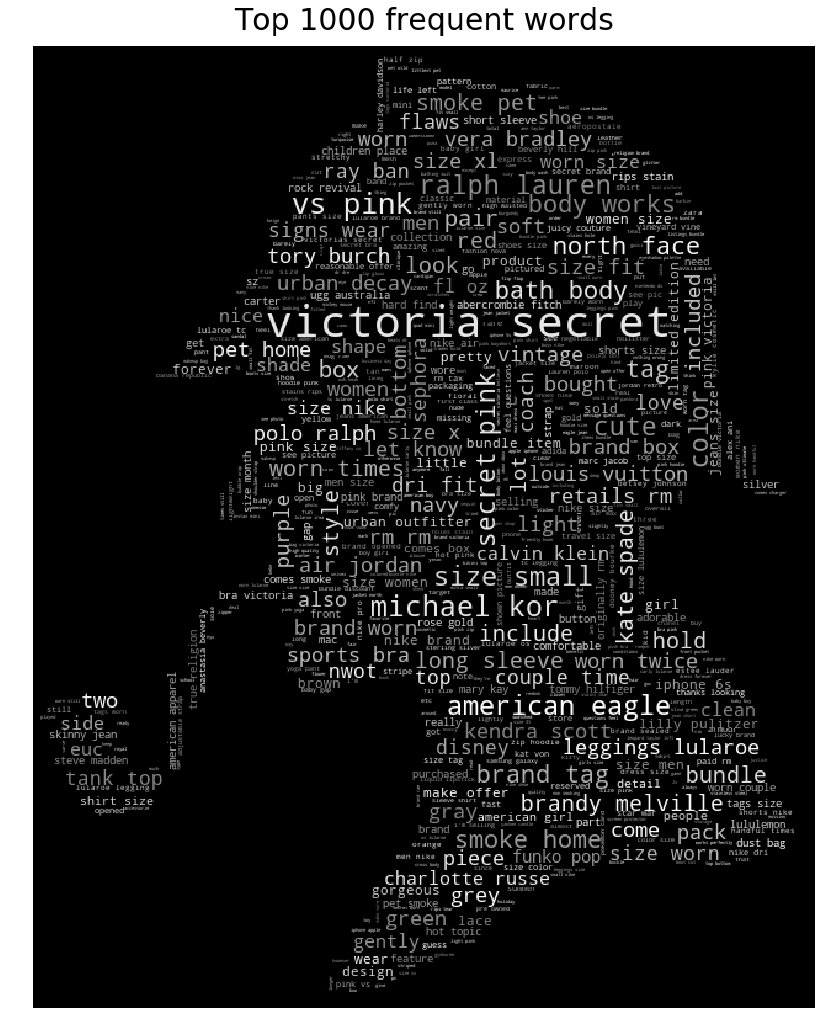

In [20]:
stopWords = stopwords.words('english')+list(set(string.punctuation))+["description","yet","please","hello","hi","call","contact","mail","bye","ttyl","wait","aaa","abu","ac","yy",'without','within','yrs','xx','whether','wherever','whereas','whenever','what','whole','whose','would','well','wedges','we','via','us','ve','upon','together','thru','throughout','though','thin','they','therefore','that','re','none','must']
stop =  ["a's","aab","aac","unused","unlocked","crop","never","ask","back","check","original","online","listing","manual","generation","work","working","save","may","purchase","purshase","damage","minnie","authentic","perfect","medium","background","dunn","exact","flaw","full","great","happy","imperfection","like","purse","receive","responsible","retail","sample","time","use","wick","per","shipping","month","shipped","question","answer","faq","logo","beautiful","condition","print","tested","used","mint","package","item","price","new","nwt","description","excellent","sale","blue","good","case","final","free","ship","shiping","exclusive","large","old","washed","plus","bnwt","one","set","white","black","come","firm","super","inside","mist","day","super"]
def grey_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(50, 100)

def generateWordCloud():
    limit = 1000
    infosize = 12
    descriptionText = " ".join(df['item_description'].astype(str)+" "+df['name'].astype(str)+" "+df['brand_name'].astype(str))
    title = 'Top 1000 frequent words'
    fontcolor='black'
    bgcolor = '#000000'
    stopword =stopWords+stop
    wordcloud = WordCloud(
        max_words=1000,
        stopwords=stopword,
        mask=imread('../input/Holmes_silhouette.png'),
        background_color=bgcolor,
    ).generate(descriptionText)
    fig = plt.figure()
    fig.set_figwidth(14)
    fig.set_figheight(18)
    plt.imshow(wordcloud.recolor(color_func=grey_color, random_state=3))
    plt.title(title, color=fontcolor, size=30, y=1.01)
    plt.axis('off')
    plt.show()
    
generateWordCloud()

____
##### Word2Vec: Vector Representations of Words 

In [21]:
#Reading directly our dataset to avoid executing our previous code again
w2vdf=pd.read_excel('../input/clustered_data.xlsx')

In [22]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Remove non letters
    4. Put all to lowercase
    5. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    
    nopunc = ''.join(nopunc)
    
    # Remove non-letters        
    nopunc = re.sub("[^a-zA-Z]", " ", nopunc) 
    
    #Put all to lowercase
    nopunc = nopunc.lower() 
    
      
    # Now just remove any stopwords
    stops = set(stopwords.words("english")+["description","yet","please","hello","hi","call","contact","mail","bye","ttyl","wait","aaa","aa","abu","ac","yy",'without','within','yrs','xx','whether','wherever','whereas','whenever','what','whole','whose','would','well','wedges','we','via','us','ve','upon','together','thru','throughout','though','thin','they','therefore','that','re','none','must'])  
    return [word for word in nopunc.split() if word not in stops]

def review_to_sentences( review, tokenizer, remove_stopwords=False ):
    
    """
    Function to split a review into parsed sentences.
    """
   
    # 1. Use the NLTK tokenizer to split the paragraph into sentences
    raw_sentences = tokenizer.tokenize(str(review).strip())
    #
    # 2. Loop over each sentence
    sentences = []
    for raw_sentence in raw_sentences:
        # If a sentence is empty, skip it
        if len(raw_sentence) > 0:
            # Otherwise, call review_to_wordlist to get a list of words
            sentences.append( text_process( raw_sentence))
    #
    # Return the list of sentences (each sentence is a list of words,
    # so this returns a list of lists
    return sentences


def transform_with_tsne(w2v_model):
    """
    FlatMap word2Vec model using tsne.
    """
    vocab = list(w2v_model.wv.vocab)
    mat = w2v_model[vocab]
    tsne = TSNE(n_components=2)
    mat_tsne = tsne.fit_transform(mat)
    df_vocab = pd.concat([pd.DataFrame(mat_tsne), pd.Series(vocab)], axis=1)
    df_vocab.columns = ['x', 'y', 'word']
    return df_vocab


def visualise_w2v(df, path_to_save):
    """
    Plots and saves Word2Vec charts.
    
    """
    # plot and save full w2v chart
    fig = plot_w2v(df, "Full Word2Vec")
    fig.savefig("%s/figure_all.png" % path_to_save)

    # Plot and save zoomed w2v charts
    x_min = np.floor(df["x"].min())
    x_max = np.ceil(df["x"].max())
    y_min = np.floor(df["y"].min())
    y_max = np.ceil(df["y"].max())
    x_range = np.linspace(x_min, x_max, 5)
    y_range = np.linspace(y_min, y_max, 5)
    xx = 1
    for xi in range(0, len(x_range) - 1):
        yy = 1
        for yi in range(0, len(y_range) - 1):
            print ("x_min = %s, x_max = %s,  y_min = %s, y_max =  %s" % (x_range[xi], x_range[xi + 1], y_range[yi], y_range[yi + 1]))
            df_subset = df[(df["x"] >= x_range[xi]) & (df["x"] < x_range[xi + 1]) & (df["y"] >= y_range[yi]) & (df["y"] < y_range[yi + 1])]
            title = "x in [%s ; %s] and y in [%s ; %s]" % (x_range[xi], x_range[xi + 1], y_range[yi], y_range[yi + 1])
            fig = plot_w2v(df_subset, title)
            fig.savefig("%s/figure_zoom_x%s_y%s.png" % (path_to_save, xx, yy))
            yy += 1
        xx += 1


def plot_w2v(w2v_df, title):
    """
    Plot a word2vec figure
    :param w2v_df: (pandas dataframe) containing x and y coordinates (from tsne)
    :param title: figure title
    :return: (figure) with plot
    """
    fig = plt.figure(figsize=[20, 20])
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(w2v_df['x'], w2v_df['y'])
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(title)
    for i, txt in enumerate(w2v_df['word']):
        ax.annotate(txt, (w2v_df['x'].iloc[i], w2v_df['y'].iloc[i]))

    return fig




x_min = -71.0, x_max = -39.25,  y_min = -64.0, y_max =  -32.5
x_min = -71.0, x_max = -39.25,  y_min = -32.5, y_max =  -1.0
x_min = -71.0, x_max = -39.25,  y_min = -1.0, y_max =  30.5
x_min = -71.0, x_max = -39.25,  y_min = 30.5, y_max =  62.0
x_min = -39.25, x_max = -7.5,  y_min = -64.0, y_max =  -32.5
x_min = -39.25, x_max = -7.5,  y_min = -32.5, y_max =  -1.0
x_min = -39.25, x_max = -7.5,  y_min = -1.0, y_max =  30.5
x_min = -39.25, x_max = -7.5,  y_min = 30.5, y_max =  62.0
x_min = -7.5, x_max = 24.25,  y_min = -64.0, y_max =  -32.5
x_min = -7.5, x_max = 24.25,  y_min = -32.5, y_max =  -1.0
x_min = -7.5, x_max = 24.25,  y_min = -1.0, y_max =  30.5
x_min = -7.5, x_max = 24.25,  y_min = 30.5, y_max =  62.0
x_min = 24.25, x_max = 56.0,  y_min = -64.0, y_max =  -32.5
x_min = 24.25, x_max = 56.0,  y_min = -32.5, y_max =  -1.0
x_min = 24.25, x_max = 56.0,  y_min = -1.0, y_max =  30.5
x_min = 24.25, x_max = 56.0,  y_min = 30.5, y_max =  62.0


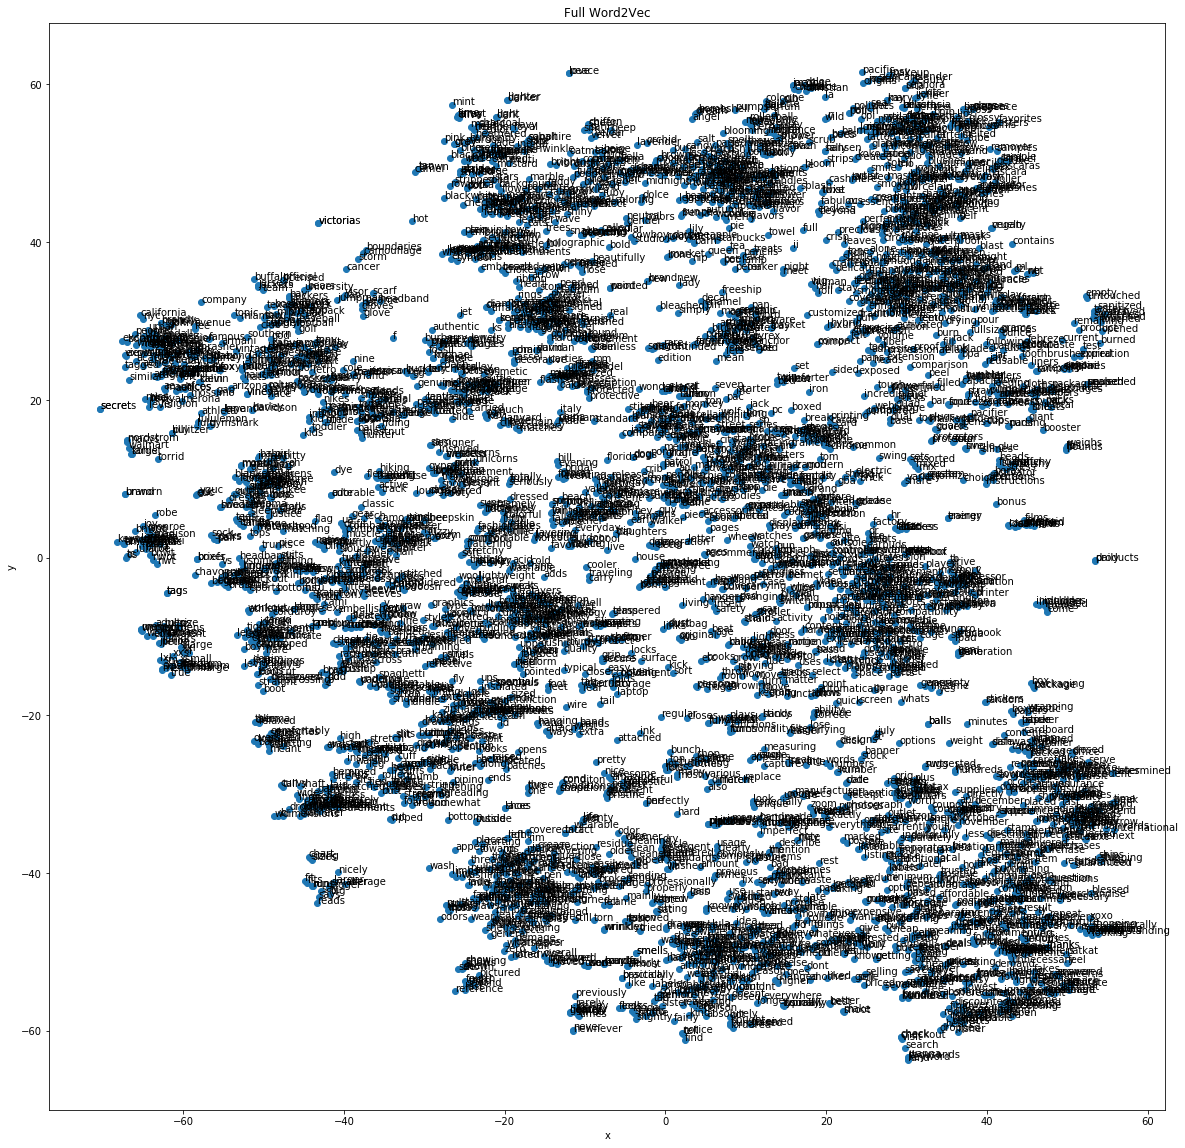

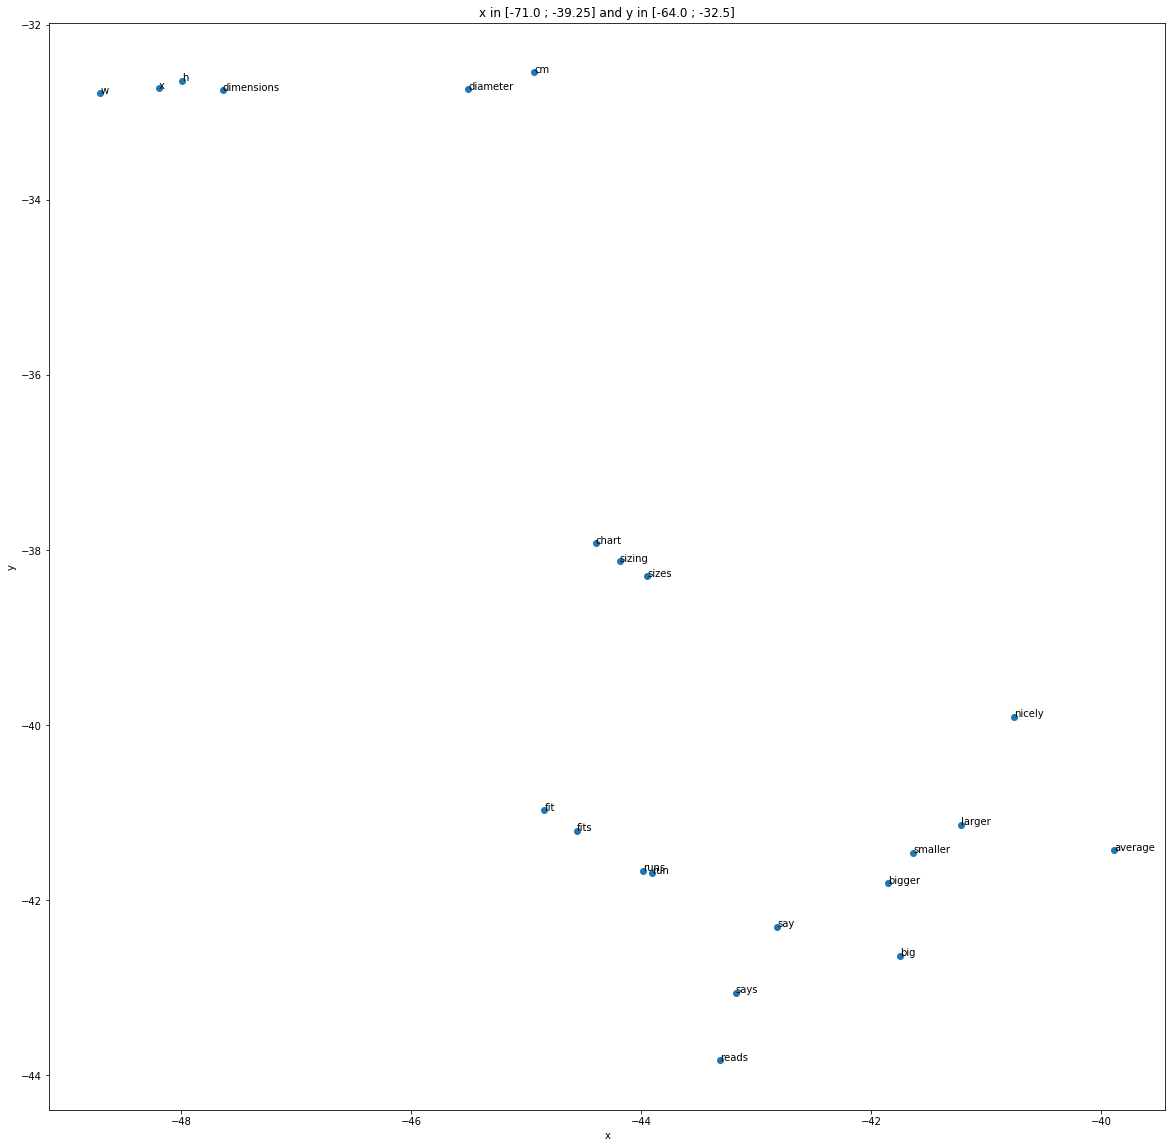

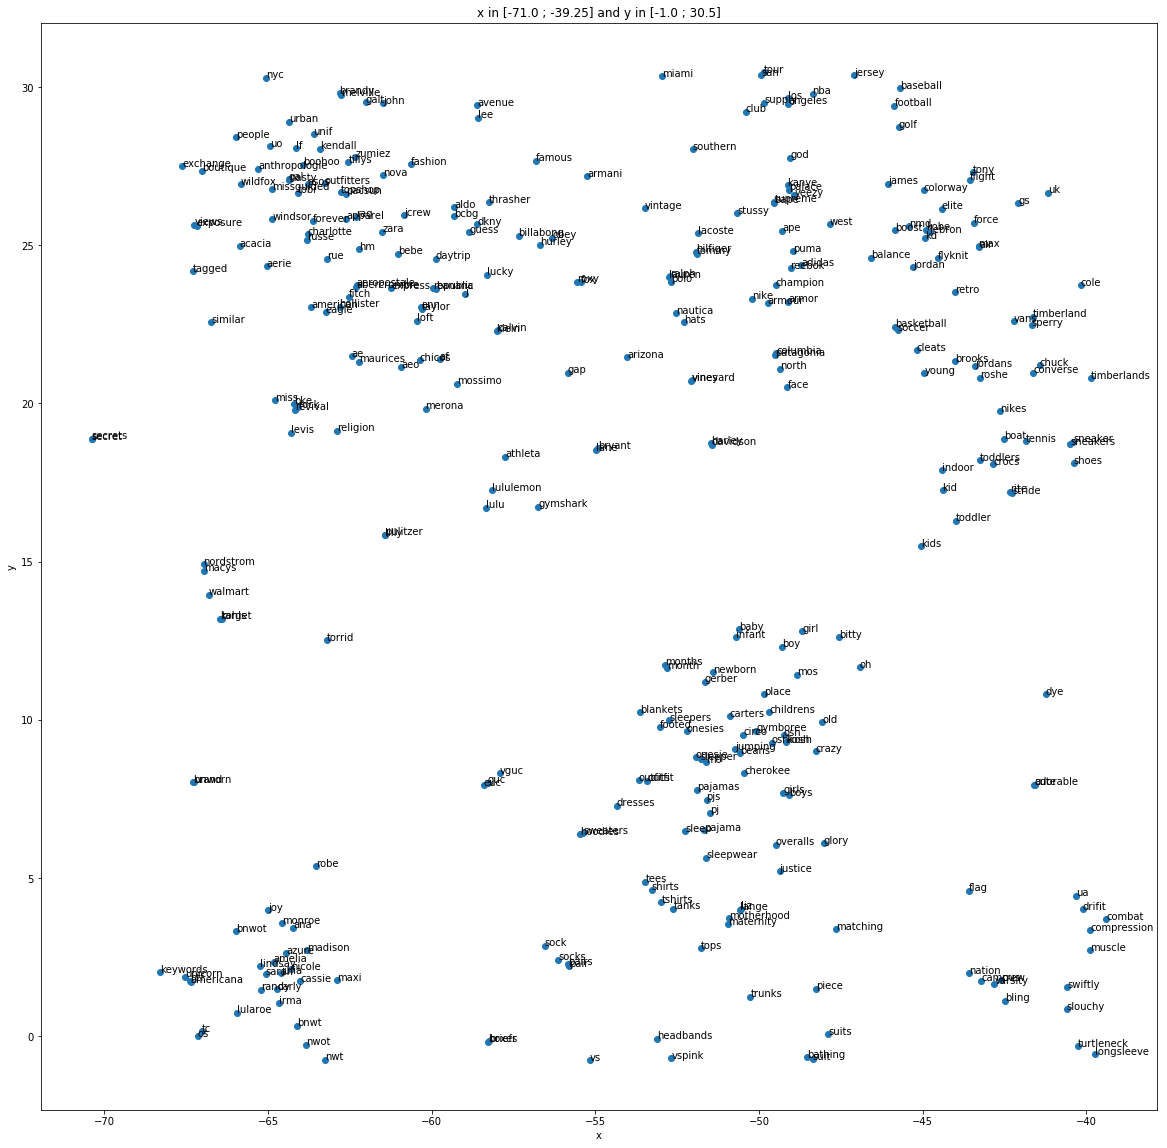

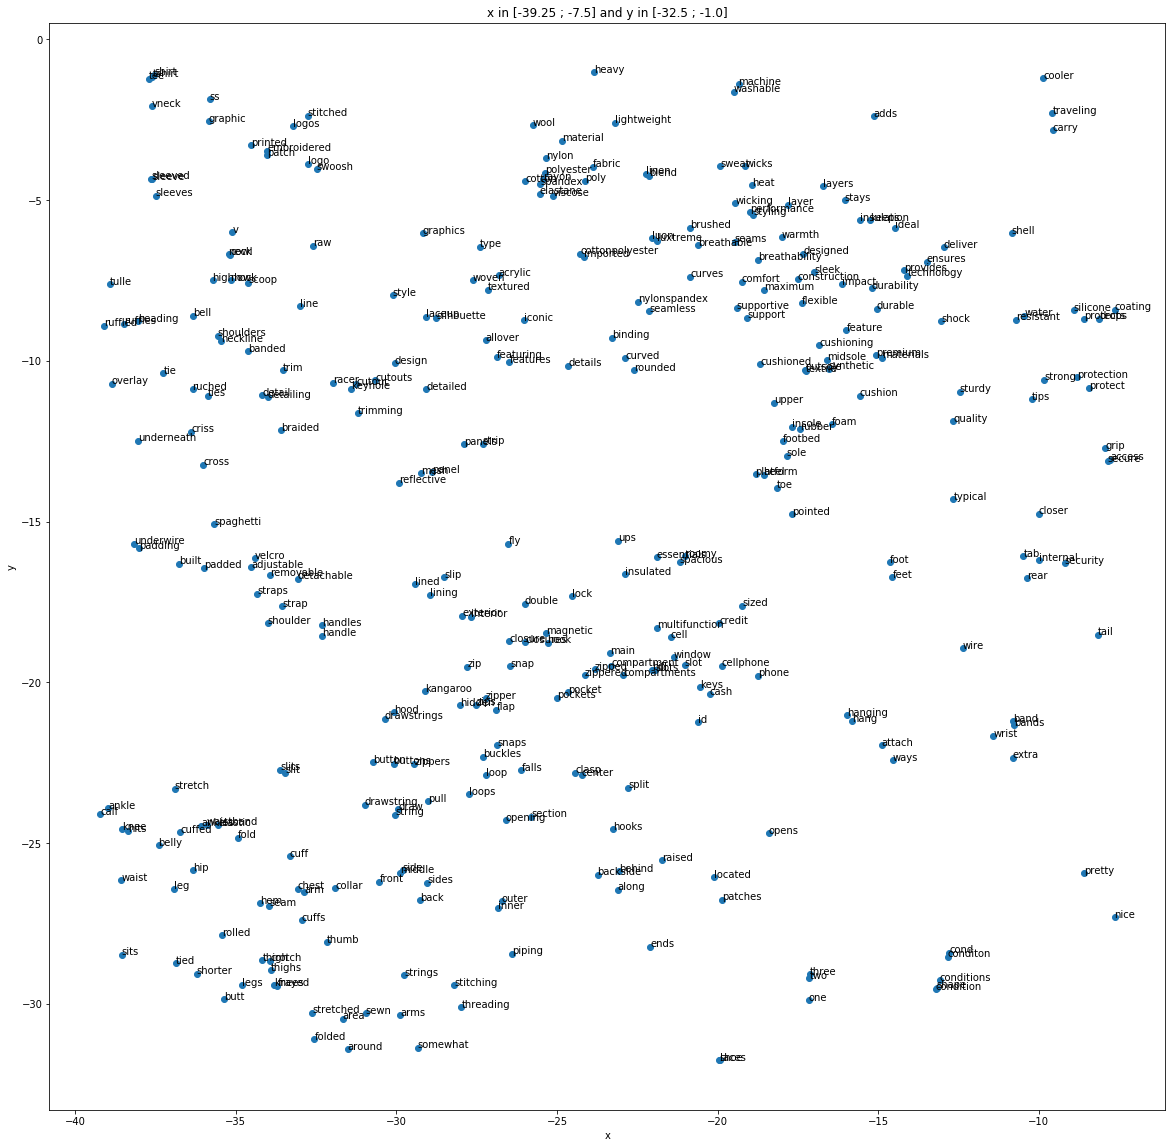

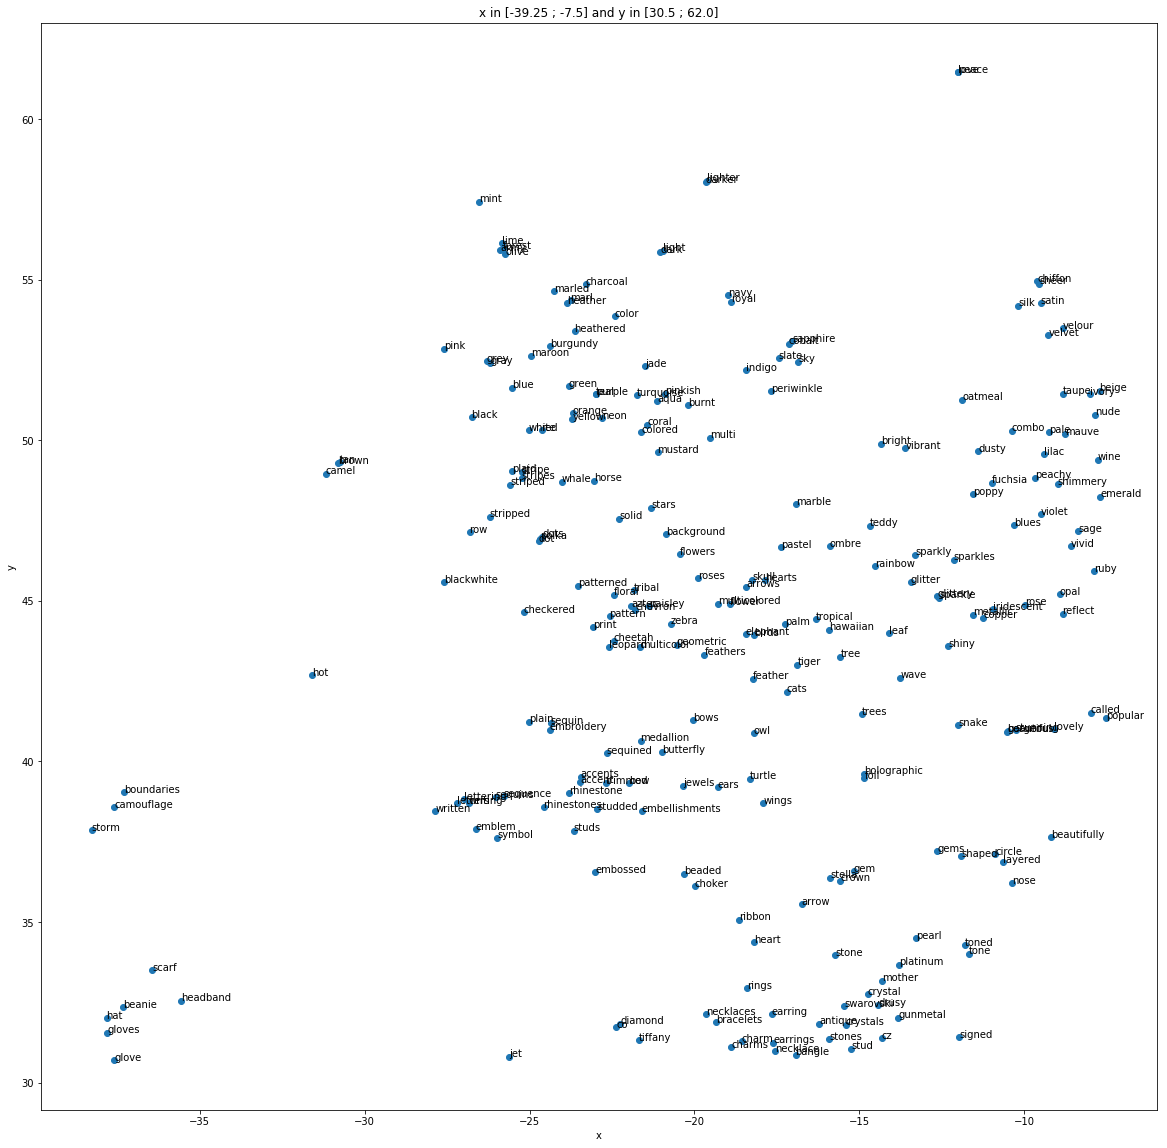

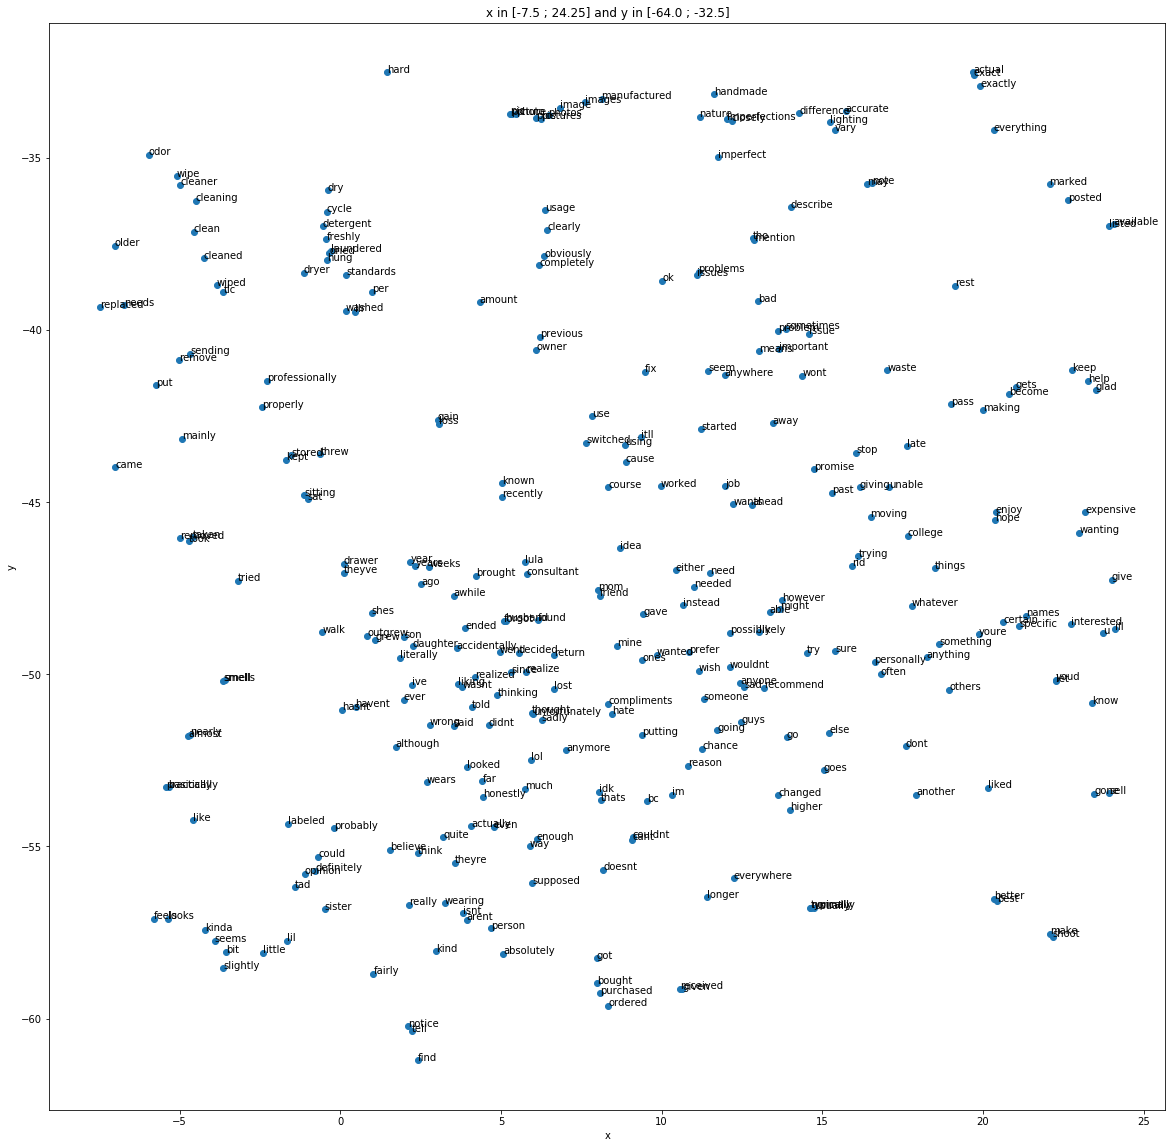

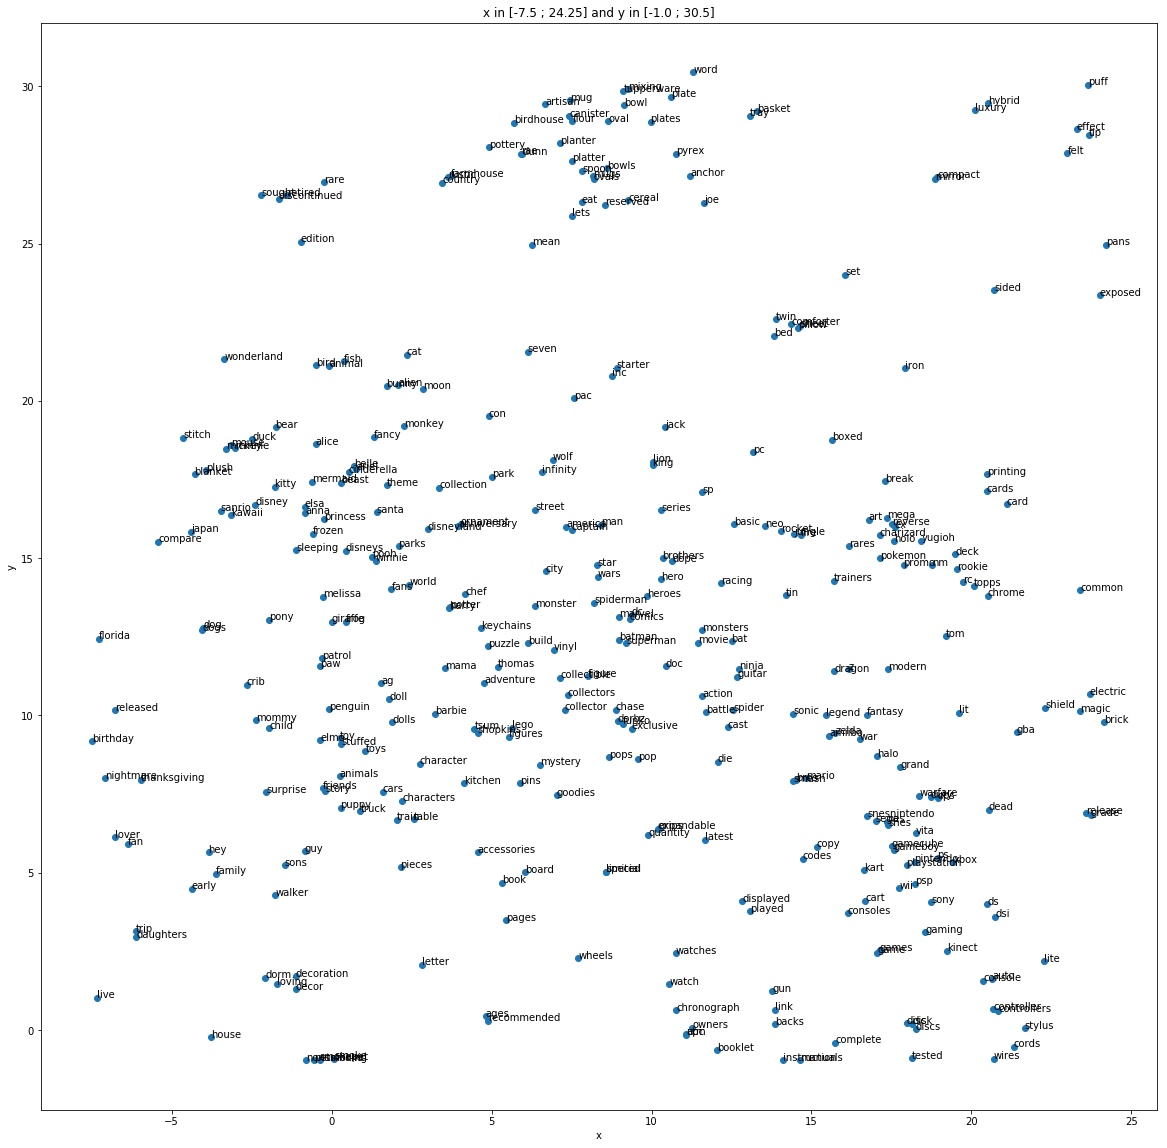

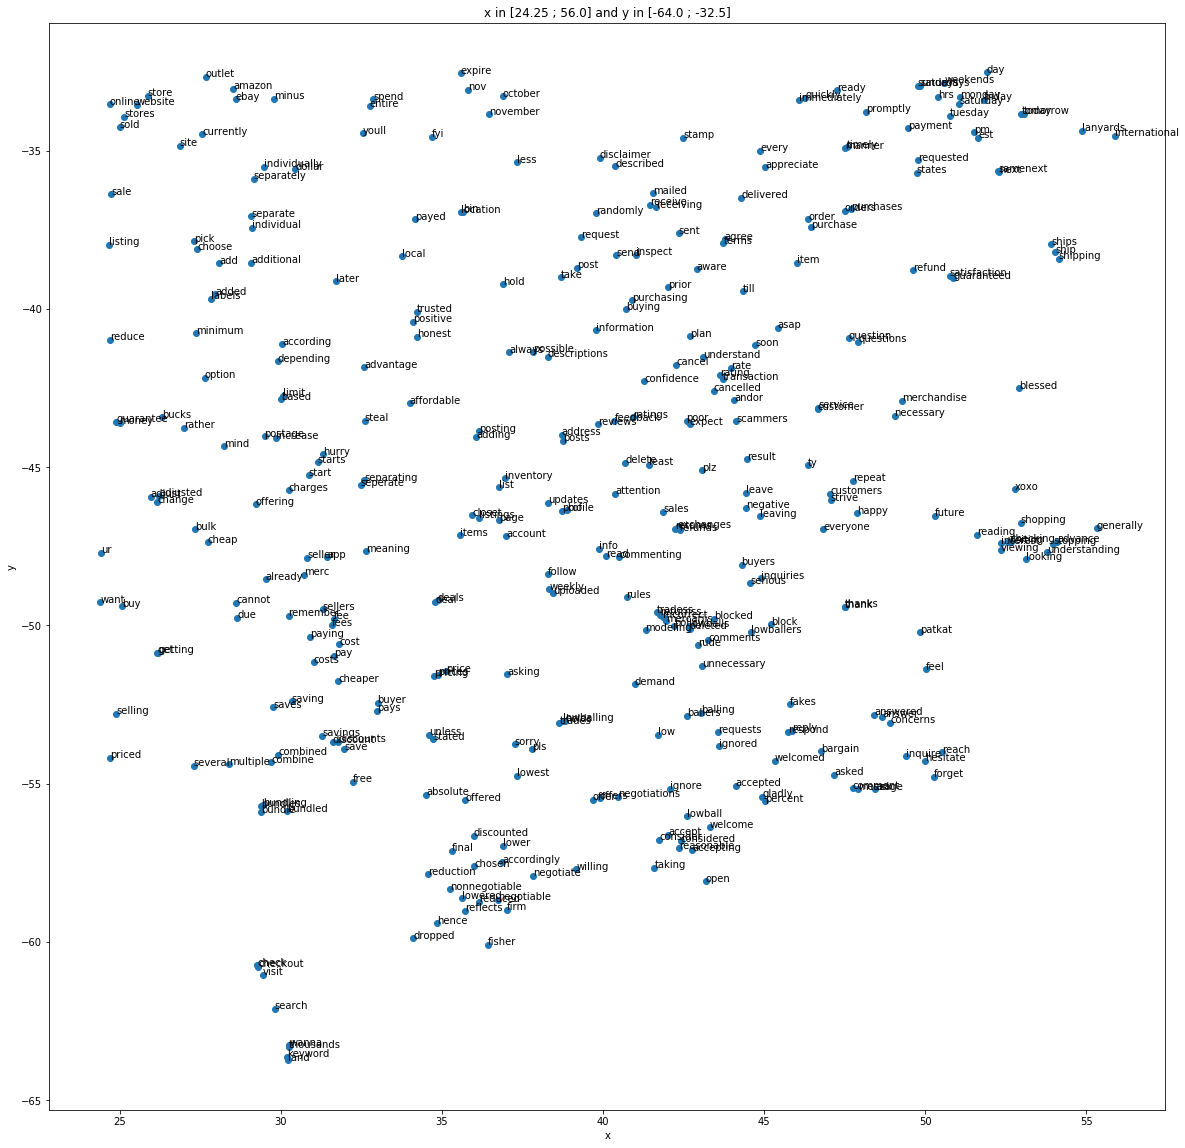

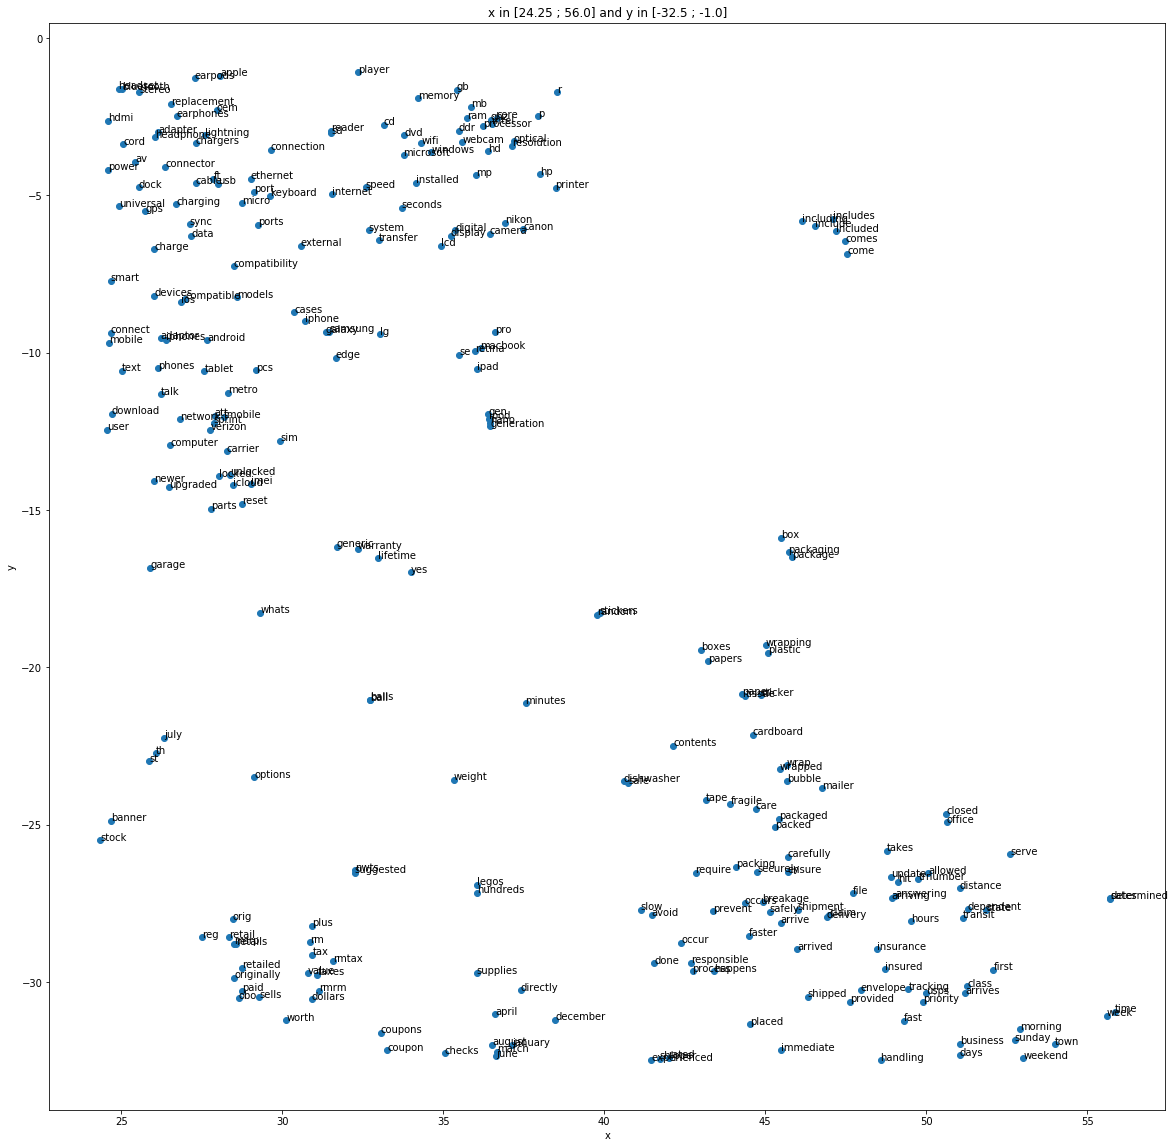

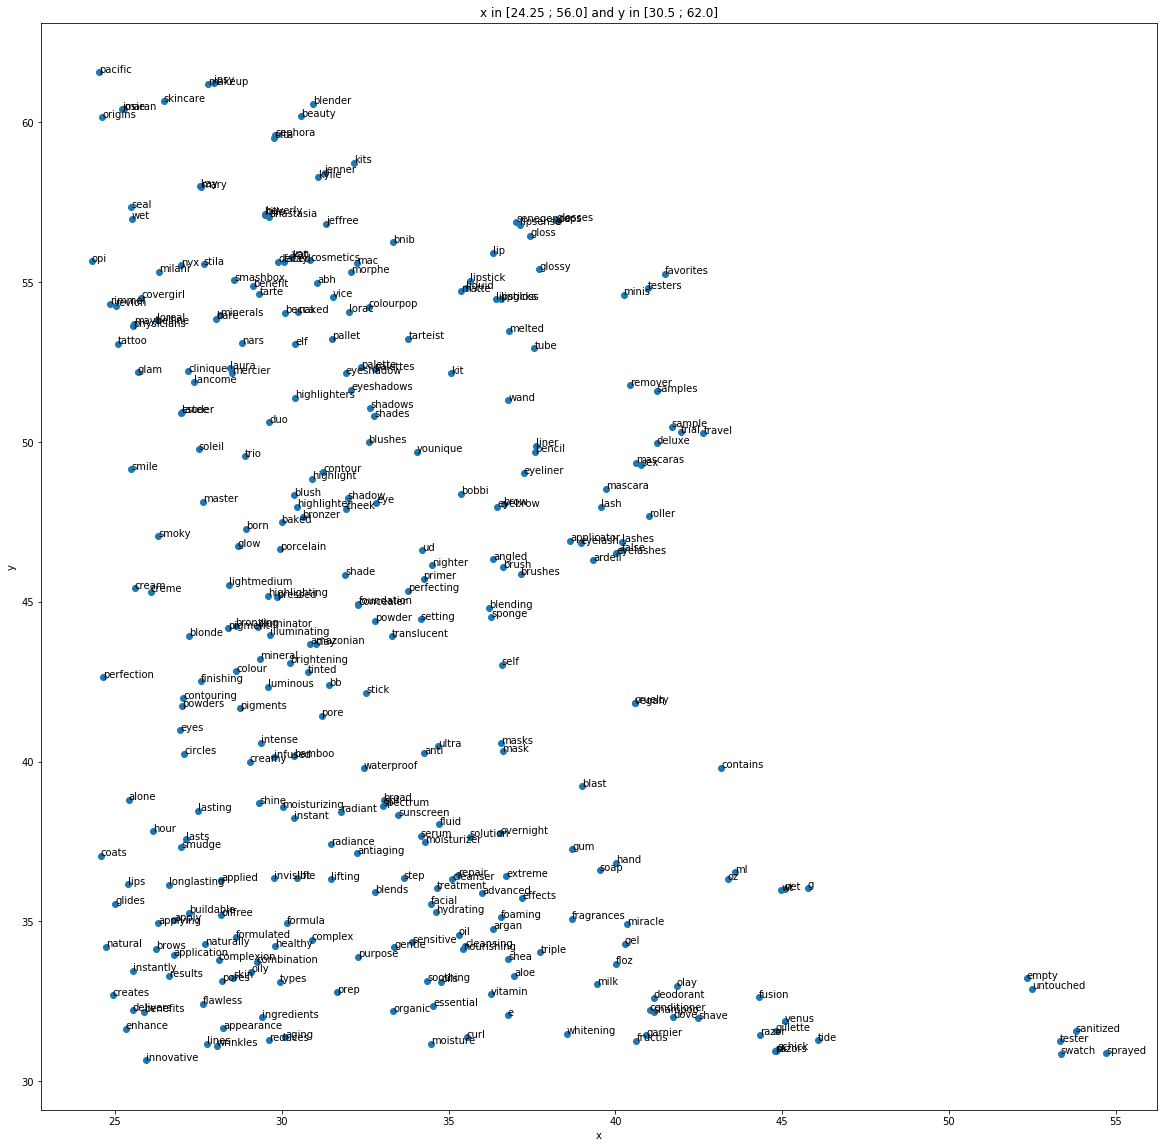

In [23]:
model = Word2Vec.load("w2v")
df_words = pd.read_csv("../output/w2v.csv")
# Making plots and exports
visualise_w2v(df_words, "../output/w2v_viz")

In [24]:
model.wv.most_similar("adidas")

[('puma', 0.8870851397514343),
 ('reebok', 0.8868682384490967),
 ('champion', 0.8645846843719482),
 ('ape', 0.8341162800788879),
 ('yeezy', 0.827461838722229),
 ('bape', 0.8018506169319153),
 ('stussy', 0.8016374111175537),
 ('tommy', 0.8006616234779358),
 ('armour', 0.7986149787902832),
 ('columbia', 0.797671914100647)]

____
##### Correspondance Analysis : Retrieve Vocabulary for Brands 

     1- Text Preprocessing :
             1-1- Defining a Tokenizer :

In [25]:
def TokenizeAndStopWordRemover(text):
    
    tknzr = TweetTokenizer()
    
    bigram_measures = nltk.collocations.BigramAssocMeasures() 
    
    #Removing Emoticons
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub('', text)
    text = re.sub("\d+", "", text) #Deleting Numbers
    for elt in [':',":",")","●","#","☆","-","■","]","❎","❤","➡","❌",'♦', '✅',"#",'✨','•','《',':',"•",'⛔','✴','♡','_','@','.']:
        match = "["+elt+']'
        text = re.sub(match, '', text) #Eliminating Emojies.
        
    text = re.sub("(^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)", '', text) #Eliminating Emails.
    text = re.sub("[0-9]", '', text) #Eliminating Numbers.
    
    tokens = [word for word in tknzr.tokenize(text) if ((word not in stopWords) and (len(word)>2)) ] #Eliminating StopWords.
    
    # Match (victoria's secret -- ernst & young ...)
    bigramsRegExBased = []            
    regEx = re.finditer("[a-zA-Z]+((['][s]|([\s][&])|[&]))([\s]|[\S])[a-zA-Z]+",text , flags=0) 
    for elt in regEx:
        bigramsRegExBased.append(elt.group())
        
    bigram_fd = nltk.FreqDist(nltk.bigrams(tokens))
    word_fd = nltk.FreqDist(tokens)
    finderBi = BigramCollocationFinder.from_words(tokens)
    bigrams =[sorted(finderBi.nbest(bigram_measures.raw_freq, 2))]         
    return tokens,bigrams

    1-2 Lemmetizing :

In [26]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize

def Lemmetizing(Tokens):
    Tok = []
    wdLem = WordNetLemmatizer()
    for tok in Tokens:
        lem = tok 
        try:
            lem = wdLem.lemmatize(tok)
        except:
            pass;
        Tok.append(lem)
    return Tok

In [27]:
indexer = pickle.load( open( "../input/tokenizing/BrandPicklerIndexer.p", "rb" ) )
allBrandMergedLemmitizer = pickle.load( open( "../input/lemmetizing/MergedBrandLemmetized.p", "rb" ) )["Lemmetizer"]

        1-3 tf-idf : Getting Top Features by Brand
            - Constructing a Brand's dictionnary : 

In [28]:
stopWords = stopwords.words('english')+list(set(string.punctuation))+["description","yet","please","hello","hi","call","contact","mail","bye","ttyl","wait","aaa","abu","ac","yy",'without','within','yrs','xx','whether','wherever','whereas','whenever','what','whole','whose','would','well','wedges','we','via','us','ve','upon','together','thru','throughout','though','thin','they','therefore','that','re','none','must']
stop =  ["a's","aab","aac","unused","unlocked","crop","never","ask","back","check","original","online","listing","manual","generation","work","working","save","may","purchase","purshase","damage","minnie","authentic","perfect","medium","background","dunn","exact","flaw","full","great","happy","imperfection","like","purse","receive","responsible","retail","sample","time","use","wick","per","shipping","month","shipped","question","answer","faq","logo","beautiful","condition","print","tested","used","mint","package","item","price","new","nwt","description","excellent","sale","blue","good","case","final","free","ship","shiping","exclusive","large","old","washed","plus","bnwt","one","set","white","black","come","firm","super","inside","mist","day","super"]
def getTOPWords(listOfWords,number):
    a = dict(Counter(listOfWords))
    sorted_x = sorted(a.items(), key=operator.itemgetter(1),reverse=True)
    i=0
    relevantWords =[]
    for elt in sorted_x:
        if elt[0] not in (stop+stopWords) and len(elt[0]) >3 :
            relevantWords.append(elt[0])
            i+=1
            if(i == number):
                return relevantWords
    return relevantWords

In [29]:
# Because the difficulty of vizualisation of all the brand we'll limit our plot to the top 10 Brands
brandForCA = [ el[0] for el in resultbrand[["brand_name"]].values.tolist()[:10]]

In [30]:
Dictonnary = []
for brand in brandForCA:
    fileNumber = str((indexer[brand]))
    LemBrand = pickle.load( open("../input/lemmetizing/Brand_"+fileNumber+"_Lemmetized.p", "rb" ) )["Lemmetizer"]
    Dictonnary = Dictonnary + getTOPWords(LemBrand,15)
Dictonnary = set(Dictonnary)
len(Dictonnary)

99

In [31]:
def tokenize(text):
    tokens, big = TokenizeAndStopWordRemover(text)
    lemm = [elt for elt in Lemmetizing(tokens) if len(elt) > 2 and elt not in stop]
    bigramsRegExBased = []                
    for elt in big:
        for eltTup in elt:
            lemm.append(" ".join(eltTup))
    return lemm

In [32]:
Corpus = []
indeces = []
for brand in brandForCA:
    fileNumber = str(indexer[brand])
    Corpus.append(" ".join(pickle.load(open("../input/lemmetizing/Brand_"+fileNumber+"_Lemmetized.p", "rb" ) )["Lemmetizer"]))
    indeces.append(brand)

In [33]:
finalVect = TfidfVectorizer(vocabulary=Dictonnary,tokenizer=tokenize,stop_words=stopWords+stop,analyzer = 'word',ngram_range=(1,3))
Corpus_tf_idf = finalVect.fit_transform(Corpus)

pickle.dump({"tfidf":finalVect,"fit":Corpus_tf_idf}, open( "../input/tfidf/Last.p", "wb" ))

In [34]:
dftfidf = pd.DataFrame(Corpus_tf_idf.toarray().tolist(),columns=Dictonnary)
dftfidf.index = indeces
dftfidf.head()

oval   sweater      gold    cassie  controller  \
nike               0.000750  0.000417  0.000705  0.001596    0.000111   
pink               0.002618  0.000087  0.011610  0.004538    0.000117   
victoria's secret  0.001118  0.001739  0.078696  0.067975    0.000000   
lularoe            0.000000  0.001509  0.000000  0.003098    0.000000   
apple              0.000425  0.314619  0.000000  0.005426    0.000000   

                     bikini  platter     color      body   lularoe    ...     \
nike               0.078702      0.0  0.000333  0.061352  0.000496    ...      
pink               0.091516      0.0  0.000000  0.092461  0.000000    ...      
victoria's secret  0.133015      0.0  0.000373  0.125672  0.000000    ...      
lularoe            0.101936      0.0  0.000755  0.029753  0.000000    ...      
apple              0.115360      0.0  0.002549  0.024947  0.136700    ...      

                   tsum    hoodie     strap   console      size      lace  \
nike                0.0  0.000000  0.001417  0.002357  0.000667  0.000532   
pink                0.0  0.000000  0.129955  0.211226  0.001746  0.000398   
victoria's secret   0.0  0.000000  0.284642  0.402185  0.004843  0.000453   
lularoe             0.0  0.113170  0.000503  0.000115  0.000000  0.000229   
apple               0.0  0.001899  0.003187  0.004070  0.008285  0.048449   

                       bros      sexy   charger   classic  
nike               0.089746  0.149830  0.000347  0.011258  
pink               0.005237  0.111704  0.000800  0.000000  
victoria's secret  0.004347  0.108533  0.002069  0.000000  
lularoe            0.003270  0.163748  0.000314  0.000168  
apple              0.000000  0.003876  0.003362  0.000000  

[5 rows x 99 columns]

In [35]:
ca = prince.CA(dftfidf,n_components=5)

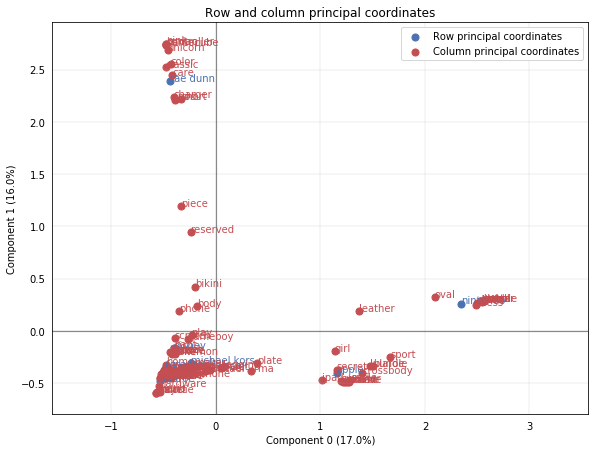

In [36]:
ca.plot_rows_columns(show_row_labels=True, show_column_labels=True)
plt.show()

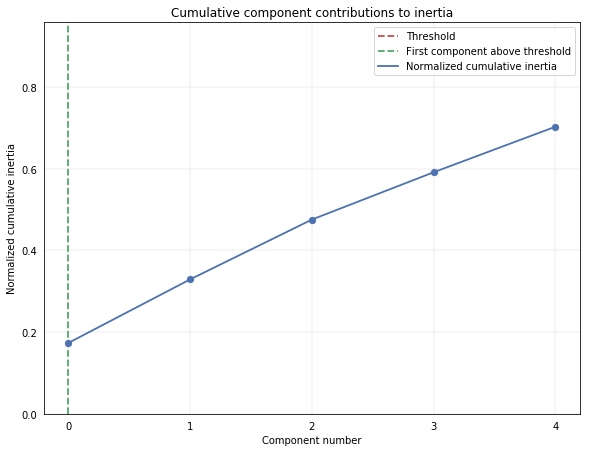

In [37]:
ca.plot_cumulative_inertia(threshold=-1)
plt.show()

___
##### Data Collection  :

    - Yelp Api :


    - Facebook GraphAPI :

    - Constructing Rating

___
##### Brands Clustering  : 

 - Load collected data and construct dataset for clustering

Construct statictical data 

In [38]:
dfSrc = df[df["price"]>0].copy()
dfSrc.reset_index(inplace=True,drop=True)
listBrand = df.brand_name.unique()
columns = ["brand_name","category_main","category_sub1",'category_sub2',"price"]
groupByDF = pd.DataFrame([],columns=['brand_name', 'min', 'max', 'mean', 'UniQMainCat', 'UniQSubCat','UniQSubSubCat', 'std', 'var'])
for brand in listBrand:
    dfTmp = (dfSrc[dfSrc["brand_name"]==brand])[columns]
    std = 0
    var = 0
    articleCount = len(dfTmp)

    if(len(dfTmp)>1):
        std = dfTmp["price"].std()
        var = dfTmp["price"].var()
    groupByDF = groupByDF.append(
        {'brand_name': brand,
         'min': dfTmp["price"].min(),
         'max': dfTmp["price"].max(),
         'mean': dfTmp["price"].mean(),
         'UniQMainCat': (len(dfTmp["category_main"].unique())),
         'UniQSubCat': (len(dfTmp["category_sub1"].unique())),
         'UniQSubSubCat': (len(dfTmp["category_sub2"].unique())),
         'std': std,
         'var': var,
         'articleCount': articleCount
        }, 
    ignore_index=True)

groupByDF = groupByDF.sample(frac=1).reset_index(drop=True)
groupByDF.dropna(axis=0, how='any',inplace=True)


In [39]:
# load fb and yelp data 
fb = pd.read_excel('../input/FBGraphAPIAllBrands.xls', sep=';')
yelp = pd.read_excel('../input/dfYelpAPIAllBrands.xls', sep=';')

dfMerged = groupByDF.merge(fb,on="brand_name",how="left").merge(yelp,on="brand_name",how="left")

In [40]:
dfMerged.head()

brand_name   min    max       mean UniQMainCat UniQSubCat  \
0           empire   5.0   31.0  12.750000           2          4   
1         ed hardy   7.0   40.0  14.187500           3          8   
2  champion sports   9.0   31.0  18.000000           2          3   
3           wilton   3.0   21.0  11.156250           1          3   
4          wildfox  12.0  190.0  48.285714           2          4   

  UniQSubSubCat        std          var  articleCount  likesFB  localRatingFB  \
0             5   7.722879    59.642857           8.0  8147097         5944.3   
1             9   7.850425    61.629167          16.0  1790540          350.4   
2             3   9.273618    86.000000           4.0    30917          386.1   
3             3   5.495508    30.200605          32.0  1805535         1430.8   
4             4  63.239530  3999.238095           7.0   195125         1091.5   

   review_countFB  talking_about_countFB  were_here_countFB  localRatingYelp  \
0            1427                 170442              16581            582.5   
1              73                   2605                246           4284.5   
2              81                   1708                354           5928.5   
3             314                  15258              10888           1230.0   
4             240                    668               7530           3575.5   

   review_countYelp  RatingYelp  
0             183.0    3.183060  
1            1083.0    3.956140  
2            1282.0    4.624415  
3             283.0    4.346290  
4            1022.0    3.498532

In [41]:
#change types
dfMerged.UniQMainCat = dfMerged.UniQMainCat.astype('int64')
dfMerged.UniQSubCat  = dfMerged.UniQSubCat.astype('int64')
dfMerged.UniQSubSubCat = dfMerged.UniQSubSubCat.astype('int64')
dfMerged = dfMerged.set_index("brand_name")
dfMerged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2073 entries, empire to mini melissa
Data columns (total 17 columns):
min                      2073 non-null float64
max                      2073 non-null float64
mean                     2073 non-null float64
UniQMainCat              2073 non-null int64
UniQSubCat               2073 non-null int64
UniQSubSubCat            2073 non-null int64
std                      2073 non-null float64
var                      2073 non-null float64
articleCount             2073 non-null float64
likesFB                  2073 non-null int64
localRatingFB            2073 non-null float64
review_countFB           2073 non-null int64
talking_about_countFB    2073 non-null int64
were_here_countFB        2073 non-null int64
localRatingYelp          2070 non-null float64
review_countYelp         2070 non-null float64
RatingYelp               2070 non-null float64
dtypes: float64(10), int64(7)
memory usage: 291.5+ KB


- Relationship between variables

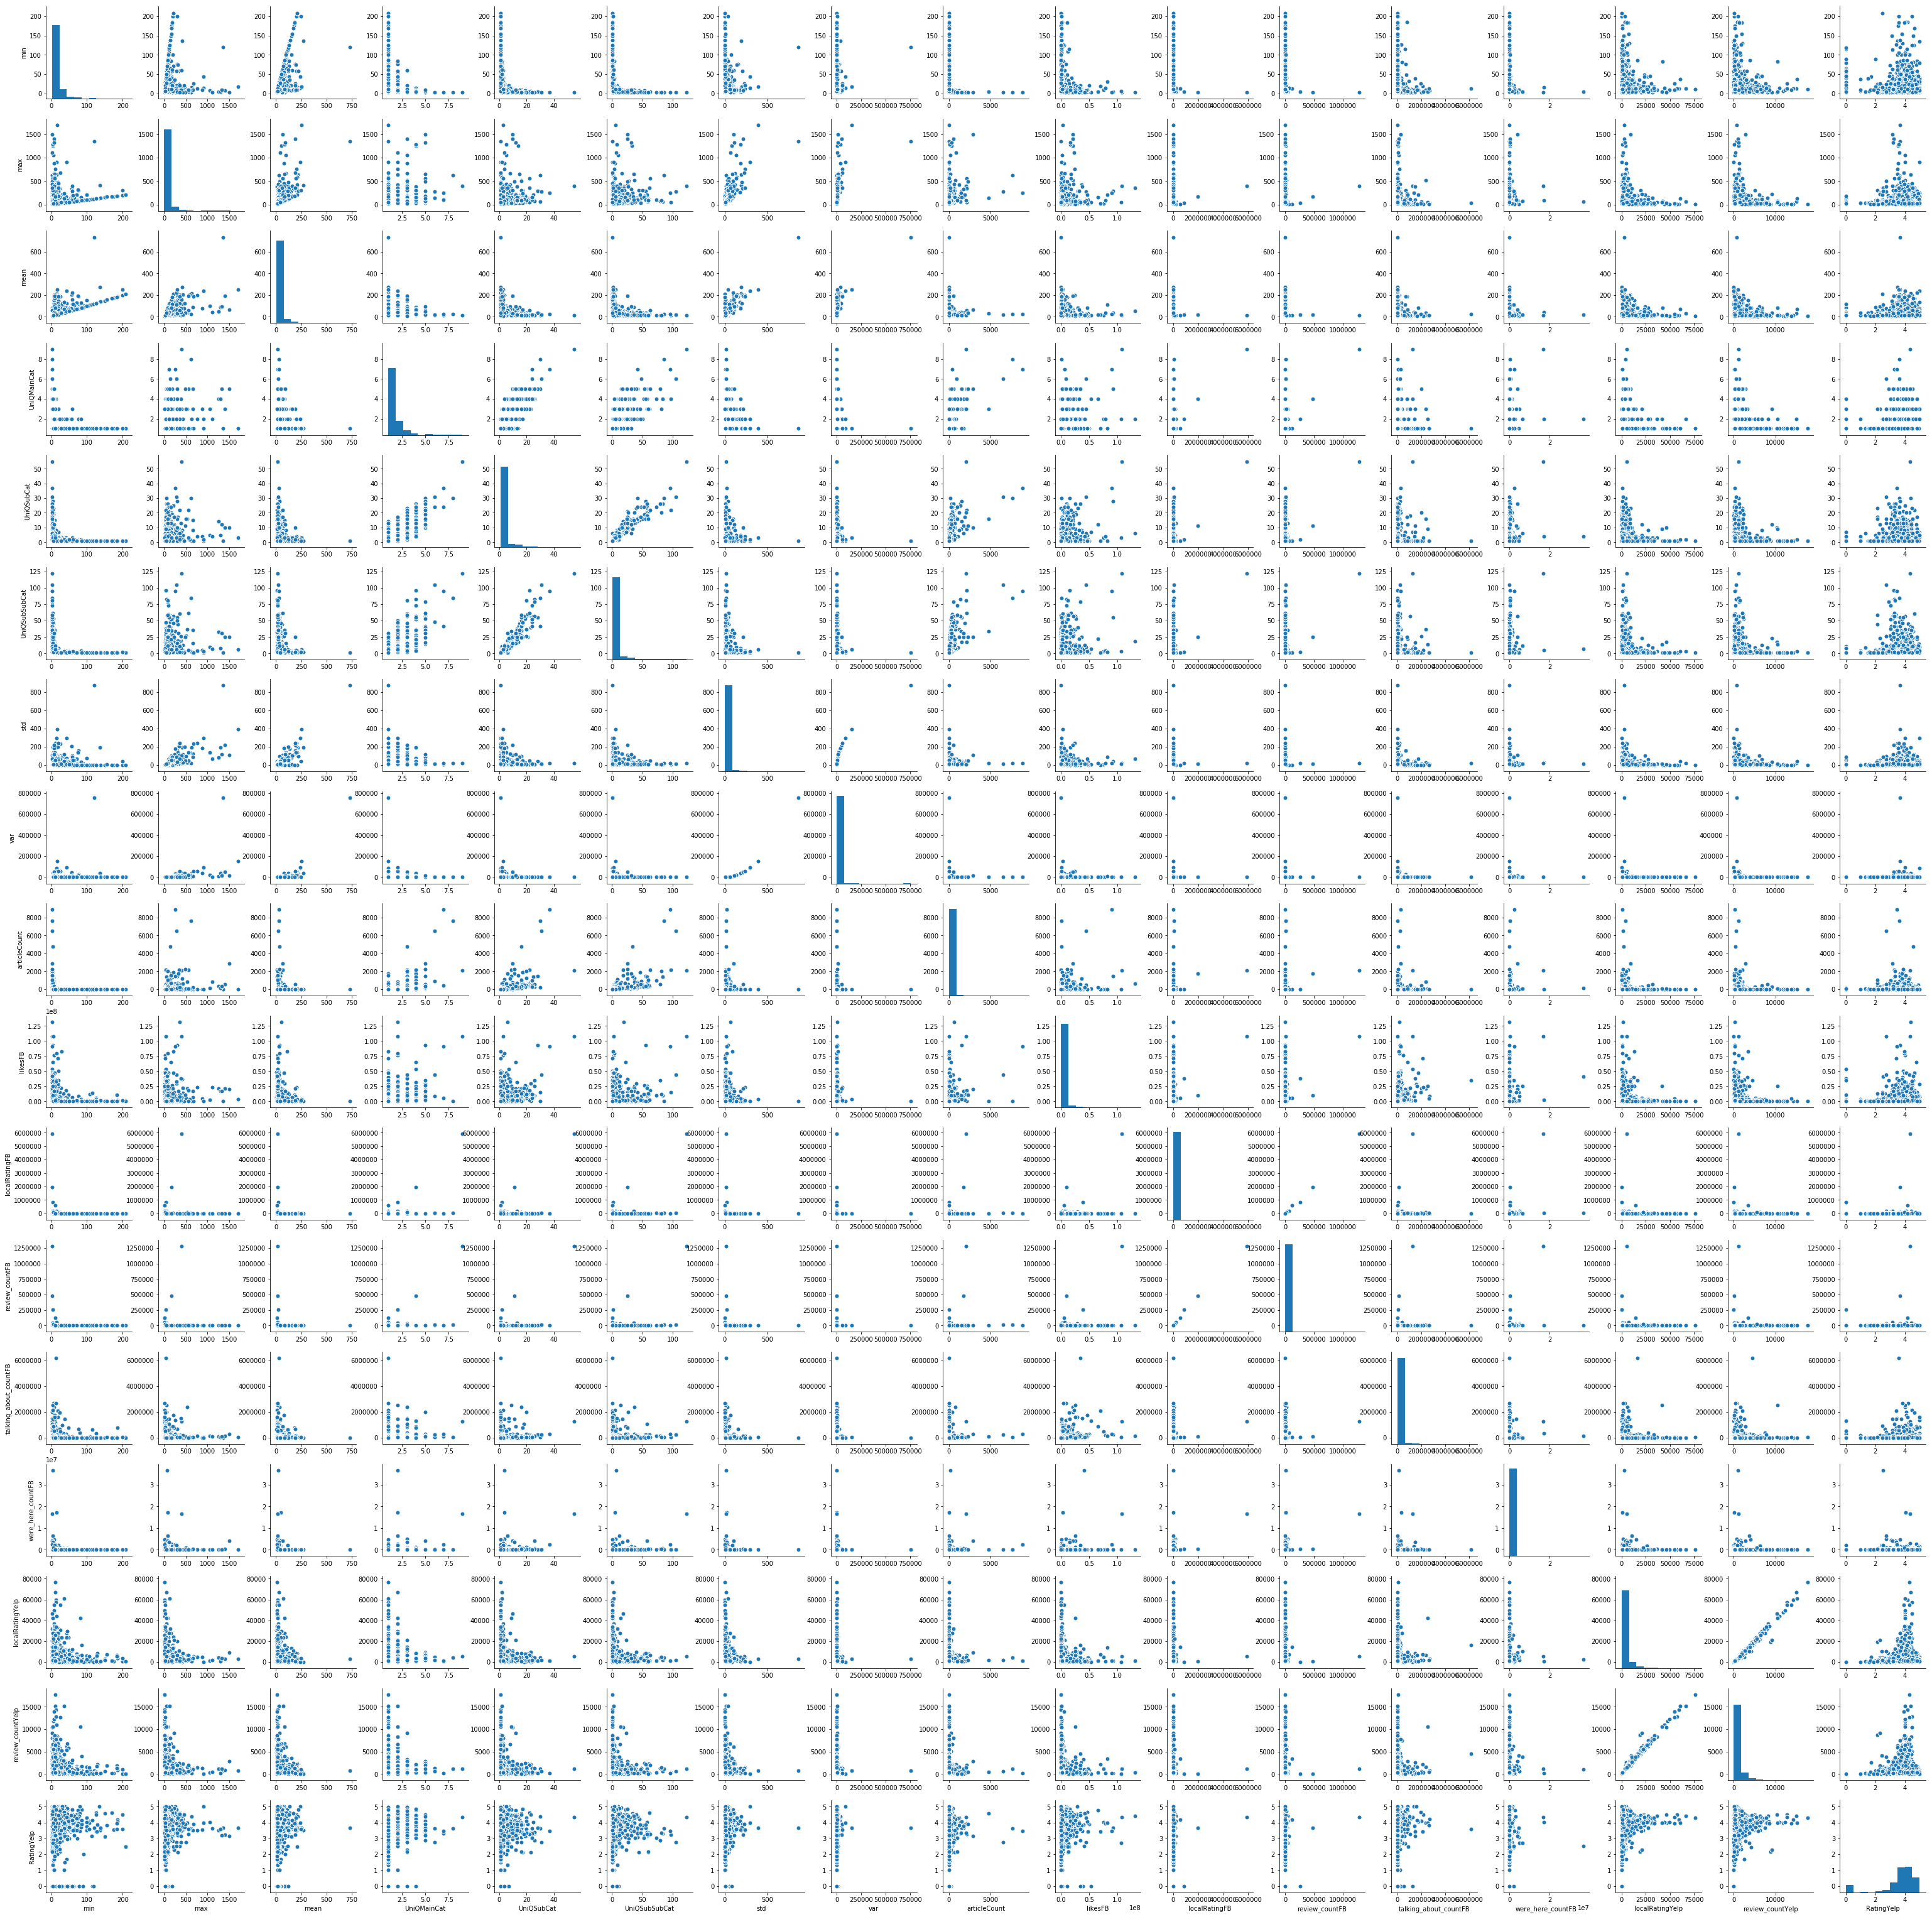

In [42]:
sns.pairplot(dfMerged.dropna())
plt.show()

The technique to determine K, the number of clusters, is called the elbow method.
The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (say, k from 1 to 10 in our case), and for each value of k calculate the sum of squared errors (SSE).
*The distortion is the sum of square errors (SSE) The “error” in this case is the difference between each data point coordinates and the centroid coordinates.

In [43]:
#Replace missing values
dfMerged =dfMerged.fillna(method='pad')

In [44]:
# k means determine k
def run_N_KMeans(X,n):
    distortions = []
    K = range(1,n)
    for k in K:
        kmeanModel = KMeans(n_clusters=k).fit(X)
        kmeanModel.fit(X)
        distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    return (distortions,K)

In [45]:
dfMerged_normalized = dfMerged.select_dtypes(exclude=['object'])
# normalize and standardize the data attributes
dfMerged_normalized= (dfMerged_normalized-dfMerged_normalized.mean())/dfMerged_normalized.std()

In [46]:
distortions,K  = run_N_KMeans(dfMerged,8)

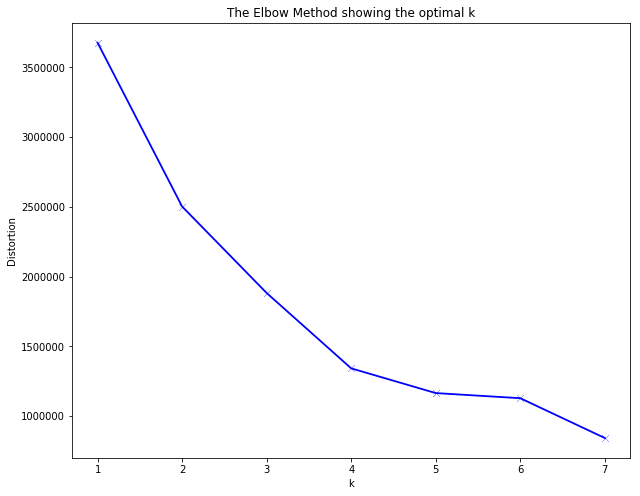

cluster_errors  num_clusters
0    3.675958e+06             1
1    2.501975e+06             2
2    1.882327e+06             3
3    1.342304e+06             4
4    1.165141e+06             5
5    1.128501e+06             6
6    8.430721e+05             7

In [47]:
## Plot the eblow
plt.figure(figsize=(10,8))
plt.plot()
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
clusters_df = pd.DataFrame({ "num_clusters":K, "cluster_errors": distortions })
clusters_df[0:12]

=> We can see that 6 seems the opptimal value of cluster

    - Projection Method, Dimentionnality reduction : 
        - Computing EigenValues : 

In [48]:
pca_2 = PCA(n_components=17) #Trying the Max Components == Number of Features (17) to compute all eigenValues
pca_data = pca_2.fit_transform(dfMerged_normalized) 
print(pca_2.explained_variance_)

[  4.03151069e+00   3.02544919e+00   2.05273082e+00   1.84367794e+00
   1.14339050e+00   1.05939706e+00   9.50723631e-01   7.99573621e-01
   5.89363279e-01   5.33817303e-01   4.80823914e-01   2.77982079e-01
   1.34140284e-01   4.53891675e-02   2.29802628e-02   7.18097281e-03
   1.86929233e-03]


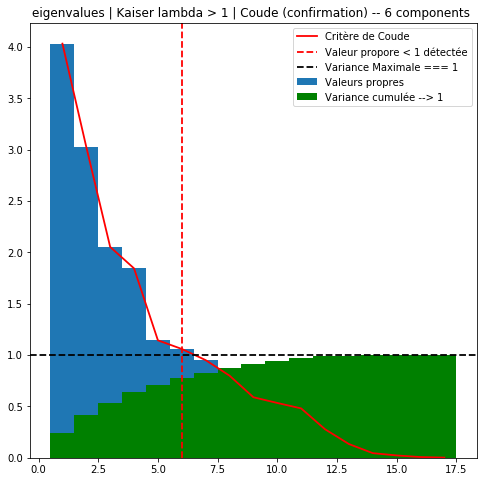

In [49]:
cumutiveVariance = [sum(pca_2.explained_variance_ratio_[:i]) for i in range(1,18)]
width = 1
xs = [elt for elt in range(1,18)]
plt.figure(figsize=(8, 8))
plt.bar(xs, pca_2.explained_variance_, width, align='center',label='Valeurs propres')
plt.bar(xs, cumutiveVariance, width, align='center',color="green",label='Variance cumulée --> 1')
plt.plot(xs, pca_2.explained_variance_,color="red",label='Critère de Coude')
plt.axvline(x=6,color='red',linestyle='--',label='Valeur propore < 1 détectée')
plt.axhline(y=1,color='black',linestyle='--',label='Variance Maximale === 1')
plt.legend()
plt.title("eigenvalues | Kaiser lambda > 1 | Coude (confirmation) -- 6 components ")
ax.set_xticks(xs)
plt.show()

Thanks to tha Kaiser Criteria We'll need 6 Components. ( eigenvalues > 1  for the 6 first axis )
We confirm our choice with elbow Criteria (Red line is continuously decreasing after the 7th component) 

    - Correlation Circle : 

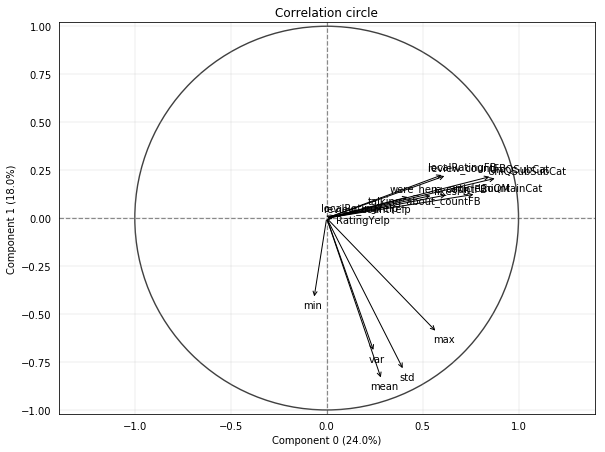

In [50]:
pca = prince.PCA(dfMerged_normalized, n_components=6)
pca.plot_correlation_circle()
plt.show()

    - KMeans method : 

In [51]:
## Let's see the result with 6 clusters
kmeans_6 = KMeans(n_clusters=6)
kmeans_6.fit(dfMerged_normalized.values)
labels = kmeans_6.predict(dfMerged_normalized)
centroids = kmeans_6.cluster_centers_


In [52]:
#index triés des groupes 
clust_6 = np.argsort(kmeans_6.labels_) 
gdf=dfMerged.iloc[clust_6]
gdf['brands']=dfMerged_normalized.index[clust_6]
gdf['groupe']=kmeans_6.labels_[clust_6]
#gdf.groupby(['groupe','brands'])['were_here_count'].count()
# pd.crosstab(columns=gdf['brands'] ,index = gdf["groupe"])
#df.loc[df['column_name'] == some_value].head()
for k in gdf['groupe'].unique() :
    print("cluster "+ str(k) + " : " + str(len(gdf.loc[gdf['groupe'] ==k ]['brands'])))
    
print(gdf.groupby(['groupe','brands']))

cluster 0 : 1767
cluster 1 : 1
cluster 2 : 99
cluster 3 : 103
cluster 4 : 1
cluster 5 : 102


    - CAH method

[3 3 3 ..., 2 3 3]


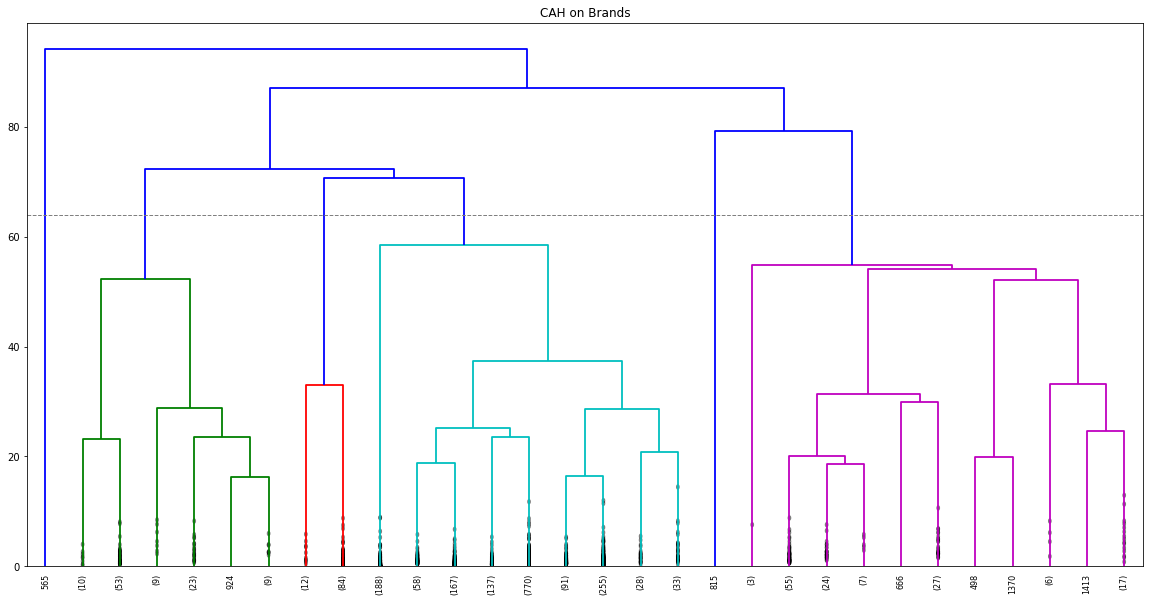

6

In [53]:
Z = linkage(dfMerged_normalized,method='ward',metric='euclidean')
#affichage du dendrogramme
plt.figure(figsize=(20, 10))
dendrogram(Z, leaf_rotation=90, leaf_font_size=8,color_threshold=64,show_contracted=True, truncate_mode='lastp')
groupes_cah = fcluster(Z,t=60,criterion='distance')
print(groupes_cah)
plt.title("CAH on Brands")
plt.axhline(y=64, c='grey', lw=1, linestyle='dashed')
plt.show()
max(groupes_cah)

In [54]:
#showing observervations vs their clusters
groupes_cah = fcluster(Z,t=60,criterion='distance')
idg = np.argsort(groupes_cah)

brands_vs_clusters=pd.DataFrame(dfMerged_normalized.index[idg],groupes_cah[idg])
# brands_vs_clusters.colums=["groupe","brand"]
print(brands_vs_clusters.groupby([brands_vs_clusters.index,'brand_name']))
for k in brands_vs_clusters.index.unique() :
    print("cluster "+ str(k) + " : " + str(len(brands_vs_clusters.loc[brands_vs_clusters.index ==k ]['brand_name'])))


cluster 1 : 105
cluster 2 : 96
cluster 3 : 1727
cluster 4 : 143
cluster 5 : 1
cluster 6 : 1


 - 2 D scatter plot of Kmeans and CAH results with 6 clusters

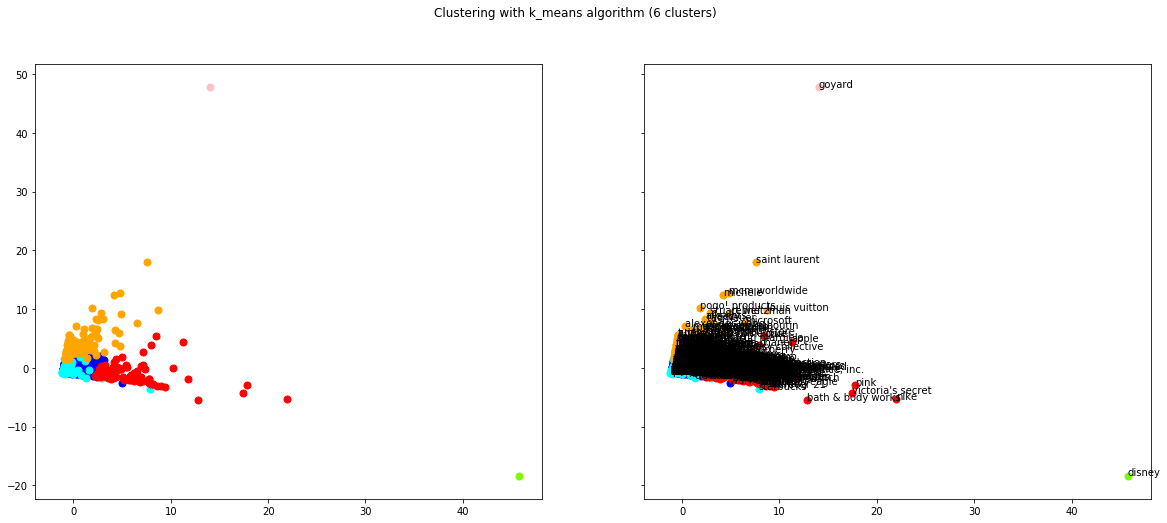

In [55]:
#ACP KMEANS
acp_subset = pca_2.fit_transform(dfMerged_normalized)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(20,8))

f.suptitle('Clustering with k_means algorithm (6 clusters)')

for couleur,k in zip(['blue','lawngreen','aqua',"red","pink","orange"],[0,1,2,3,4,5]):
    ax1.scatter(acp_subset[labels==k,0],acp_subset[labels==k,1],c=couleur)
for couleur,k in zip(['blue','lawngreen','aqua',"red","pink","orange"],[0,1,2,3,4,5]):
    ax2.scatter(acp_subset[labels==k,0],acp_subset[labels==k,1],c=couleur)
#mettre les labels des points
for i,label in enumerate(dfMerged_normalized.index):
    ax2.annotate(label,(acp_subset[i,0],acp_subset[i,1]))


In [56]:
#ACP
acp_subset = pca_2.fit_transform(dfMerged_normalized)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(20,6))

f.suptitle('Clustering with CAH algorithm (6 clusters) ')

for couleur,k in zip(['blue','lawngreen','aqua',"red","pink","orange"],[1,2,3,4,5,6]):
    ax1.scatter(acp_subset[groupes_cah==k,0],acp_subset[groupes_cah==k,1],c=couleur)
for couleur,k in zip(['blue','lawngreen','aqua',"red","pink","orange"],[1,2,3,4,5,6]):
    ax2.scatter(acp_subset[groupes_cah==k,0],acp_subset[groupes_cah==k,1],c=couleur)
#mettre les labels des points
for i,label in enumerate(dfMerged_normalized.index):
    ax2.annotate(label,(acp_subset[i,0],acp_subset[i,1]))

There we can see that both of algorithm gives us practically the same results but by looking more, we can notice that the points are better distributed between the classes with KMeans than with CAH. 
Let's start looking better at the properties of each class!

After fetching in brand in each class to better understand its properties, let's see the mean value of each cluster and compare it to the mean value of this variable in our original dataset.

In [57]:
# cluster frequencies
gdf.groupe.value_counts()
#  calculate clustering variable means by cluster
clustergrp = gdf.groupby('groupe').mean()
## Add the mean value of each column 
ColumnMeanValue=dfMerged.mean()
clustergrp.loc["ColumnMeanValue"]=ColumnMeanValue
# drop some useless colunms
#clustergrp=clustergrp.drop(['index'], axis=1)
print ("Clustering variable:  variables means by cluster")
clustergrp

Clustering variable:  variables means by cluster


min          max        mean  UniQMainCat  UniQSubCat  \
groupe                                                                          
0                 13.917657    42.795699   22.995016     1.243350    2.065648   
1                  3.000000   400.000000   16.668120     9.000000   55.000000   
2                 14.030303    39.060606   21.283620     1.141414    1.848485   
3                  4.233010   200.388350   27.170463     3.582524   15.932039   
4                120.000000  1350.000000  735.000000     1.000000    1.000000   
5                 73.882353   296.235294  134.428849     1.313725    1.686275   
ColumnMeanValue   16.438254    63.720695   28.944158     1.361795    2.750603   

                 UniQSubSubCat         std            var  articleCount  \
groupe                                                                    
0                     2.981890    8.748619     228.933939     21.881154   
1                   122.000000   17.070321     291.395862   2064.000000   
2                     2.585859    7.884488     267.769774     22.636364   
3                    37.427184   22.534327     968.198821    794.446602   
4                     1.000000  869.741341  756450.000000      2.000000   
5                     2.450980   69.206109   11404.115982     25.078431   
ColumnMeanValue       4.704776   12.786418    1182.209929     61.436083   

                      likesFB  localRatingFB  review_countFB  \
groupe                                                         
0                2.012749e+06   3.401705e+03    8.064460e+02   
1                1.077979e+08   5.898002e+06    1.282168e+06   
2                1.893055e+06   1.047015e+04    2.236697e+03   
3                1.337542e+07   2.485018e+04    5.970961e+03   
4                9.221500e+04   1.044000e+02    2.200000e+01   
5                3.796359e+06   1.815018e+03    4.212059e+02   
ColumnMeanValue  2.709468e+06   7.568821e+03    1.730142e+03   

                 talking_about_countFB  were_here_countFB  localRatingYelp  \
groupe                                                                       
0                         4.367290e+04       4.629292e+04      2549.829938   
1                         1.250054e+06       1.666134e+07      5249.000000   
2                         1.118271e+05       5.267725e+05     25621.782828   
3                         1.572674e+05       2.479942e+05      2694.067961   
4                         8.830000e+02       7.560000e+02      2745.000000   
5                         4.739301e+04       3.526281e+04      2945.240196   
ColumnMeanValue           5.331620e+04       8.671123e+04      3679.692957   

                 review_countYelp  RatingYelp  
groupe                                         
0                      657.386531    3.568094  
1                     1208.000000    4.345199  
2                     6418.444444    3.963112  
3                      739.669903    3.655977  
4                      750.000000    3.660000  
5                      759.549020    3.680956  
ColumnMeanValue        941.942113    3.597298

____
######   Bag of words

In [58]:
dfBag=pd.read_excel('../input/clustered_data.xlsx')

In [59]:
dfBag['brand_name']=dfBag['brand_name'].apply(lambda x: str(x).replace('/',' '))
tab=[]
dfBag['brand_name']=dfBag['brand_name'].apply(lambda x: x + ' ')
for row1,row2 in zip(dfBag['brand_name'],dfBag['item_description']):
    tab.append(str(row1) + str(row2))
dfBag['item_description']=tab

In [60]:
dfBag['length'] = dfBag['item_description'].apply(len)
dfBag=dfBag.drop(['brand_name'],axis=1)
dfBag.head()

name  item_condition_id  \
0                       brandy top                  3   
1              brandy melville tee                  2   
2                      halter tops                  2   
3  brandy melville hooded cardigan                  3   
4                   brandy sweater                  2   

                   category_name  price  shipping  \
0    women/tops & blouses/blouse   22.0         0   
1  women/tops & blouses/t-shirts   16.0         0   
2    women/tops & blouses/halter    9.0         0   
3        women/sweaters/cardigan   46.0         0   
4  women/tops & blouses/knit top   14.0         0   

                                    item_description category_main  \
0  brandy melville i answer questions as soon as ...         women   
1  brandy melville blue barely worn no free shipping         women   
2  brandy melville -3 perfect condition halters -...         women   
3  brandy melville condition: good please read: *...         women   
4  brandy melville thin not chunky, really cute o...         women   

    category_sub1 category_sub2  no_description  Category_0  Category_1  \
0  tops & blouses        blouse               0           0           0   
1  tops & blouses      t-shirts               0           0           0   
2  tops & blouses        halter               0           0           0   
3        sweaters      cardigan               0           0           0   
4  tops & blouses      knit top               0           0           0   

   Category_2  Category_3  Category_4  Category_5  length  
0           0           0           0           1     229  
1           0           0           0           1      49  
2           0           0           0           1     922  
3           0           0           0           1     236  
4           0           0           0           1      61

In [61]:
bow_transformer = CountVectorizer(analyzer=text_process,max_df=0.30,min_df=0.001).fit(dfBag['item_description'])
messages_bow = bow_transformer.transform(dfBag['item_description'])
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (127357, 1890)
Amount of Non-Zero occurences:  1499607


In [62]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.6230068682073676


In [63]:
i=0
for col in enumerate(bow_transformer.get_feature_names()):
    dfBag[col] = pd.SparseSeries(messages_bow[:, i].toarray().ravel(), fill_value=0)
    i=i+1

In [64]:
dfBag.head()

name  item_condition_id  \
0                       brandy top                  3   
1              brandy melville tee                  2   
2                      halter tops                  2   
3  brandy melville hooded cardigan                  3   
4                   brandy sweater                  2   

                   category_name  price  shipping  \
0    women/tops & blouses/blouse   22.0         0   
1  women/tops & blouses/t-shirts   16.0         0   
2    women/tops & blouses/halter    9.0         0   
3        women/sweaters/cardigan   46.0         0   
4  women/tops & blouses/knit top   14.0         0   

                                    item_description category_main  \
0  brandy melville i answer questions as soon as ...         women   
1  brandy melville blue barely worn no free shipping         women   
2  brandy melville -3 perfect condition halters -...         women   
3  brandy melville condition: good please read: *...         women   
4  brandy melville thin not chunky, really cute o...         women   

    category_sub1 category_sub2  no_description      ...       \
0  tops & blouses        blouse               0      ...        
1  tops & blouses      t-shirts               0      ...        
2  tops & blouses        halter               0      ...        
3        sweaters      cardigan               0      ...        
4  tops & blouses      knit top               0      ...        

   (1880, younique)  (1881, youre)  (1882, youth)  (1883, zara)  (1884, zip)  \
0                 0              0              0             0            0   
1                 0              0              0             0            0   
2                 0              0              0             1            0   
3                 0              0              0             0            0   
4                 0              0              0             0            0   

   (1885, zipper)  (1886, zippered)  (1887, zippers)  (1888, zips)  \
0               0                 0                0             0   
1               0                 0                0             0   
2               0                 0                0             0   
3               0                 0                0             0   
4               0                 0                0             0   

   (1889, zoom)  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 1907 columns]

In [65]:
dfBag['category_main']=dfBag['category_main'].replace('handmade','sports & outdoors & other')
dfBag['category_main']=dfBag['category_main'].replace('other','sports & outdoors & other')
dfBag['category_main']=dfBag['category_main'].replace('sports & outdoors','sports & outdoors & other')
dfBag['category_main'].value_counts()

women                        61216
kids                         17569
beauty                       14567
men                          11602
electronics                   9383
home                          4930
vintage & collectibles        4127
sports & outdoors & other     3419
Name: category_main, dtype: int64

___
##### Prediction / Real values Vizualisation  

In [66]:
def plot(test_y,pred):
    # Plot outputs
    obs = [cpt for cpt in range(1,len(test_y)+1)]
    rentSeriesTest = pd.Series(test_y.tolist())
    obsSeries = pd.Series(obs)
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.regplot(x=obsSeries,y=pred,truncate =True,color="red",marker="*",label="Predicted Values",scatter_kws={'alpha':0.5})
    ax.scatter(obs, rentSeriesTest, color='blue', linewidth=2,label="Real Values",alpha=0.3)
    ax.set_xlabel('Test Observation number',fontsize=7)
    ax.set_title('Prediction and real Value in test set',fontsize=8)
    plt.tight_layout()
    ax.legend(loc="best")
    plt.show()

____
###### Regression Modelisation : 

    - Cross Validation Train/test split :

In [67]:
df=pd.read_excel('../input/clustered_data.xlsx')
df['descriptionLength'] = df['item_description'].apply(lambda x : len(str(x).split()))

In [68]:
data_Columns = [elt for elt in df.columns if(elt in ['item_condition_id','shipping','Category_0','Category_1','Category_2','Category_3','Category_4',"descriptionLength"])]
X = df[data_Columns]
X_trainG, X_testG, y_trainG, y_testG = train_test_split(X,df["price"], test_size=0.2, random_state=69,shuffle=True)

    - Metric Performance Model 

In [69]:
def perfMetrics(Y, Y_pred):
    print('MAE:', mean_absolute_error(Y , Y_pred))
    print('MSE:', mean_squared_error(Y, Y_pred))
    print('RMSE:', np.sqrt(mean_squared_error(Y,Y_pred)))


    - Training 
            - Linear Model :

In [70]:
def LinearRegression(train_X,train_y):
    # Create linear regression object
    regr = linear_model.LinearRegression()
    # Train the model using the training sets
    regr.fit(train_X, train_y)
    return regr

In [71]:
Linear_Model =LinearRegression(X_trainG, y_trainG)#Getting the Coefficients for the Linear Regression

In [72]:
price_predicted = Linear_Model.predict(X_testG)

In [73]:
plot(y_testG[:1000],price_predicted[:1000])

        - Ridge Model : 

In [74]:
# prepare a uniform distribution to sample for the alpha parameter
param_grid = {'alpha': sp_rand()}
# create and fit a ridge regression model, testing random alpha values
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
rsearch.fit(X_trainG, y_trainG)
# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

def RidgeRegression(train_X,train_y):
    # Create linear regression object
    ridgeReg = Ridge(alpha=1, normalize=True)
    # Train the model using the training sets
    ridgeReg.fit(train_X, train_y)
    return ridgeReg

0.100953668707
0.968894513959


In [75]:
Ridge_Model =RidgeRegression(X_trainG, y_trainG)

In [76]:
price_predictedRd = Ridge_Model.predict(X_testG)

In [77]:
plot(y_testG[:1000],price_predictedRd[:1000])

        - Lasso Model :

In [78]:
model_bic = LassoLarsIC(criterion='bic')
model_bic.fit(X_trainG, y_trainG)
alpha_bic_ = model_bic.alpha_
model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X_trainG, y_trainG)
alpha_aic_ = model_aic.alpha_

In [79]:
def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_
    alphas_ = model.alphas_
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color,
             linewidth=3, label='%s criterion' % name)
    plt.axvline(-np.log10(alpha_), color=color, linewidth=3,
                label='alpha: %s estimate' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

In [80]:
plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()

In [81]:
def LassoRegression(train_X,train_y):
    # Create linear regression object
    lassoReg = LassoLarsIC(criterion='bic')
    # Train the model using the training sets
    lassoReg.fit(train_X,train_y)
    return lassoReg

In [82]:
Lasso_Model =LassoRegression(X_trainG, y_trainG)

In [83]:
price_predictedLs = Lasso_Model.predict(X_testG)

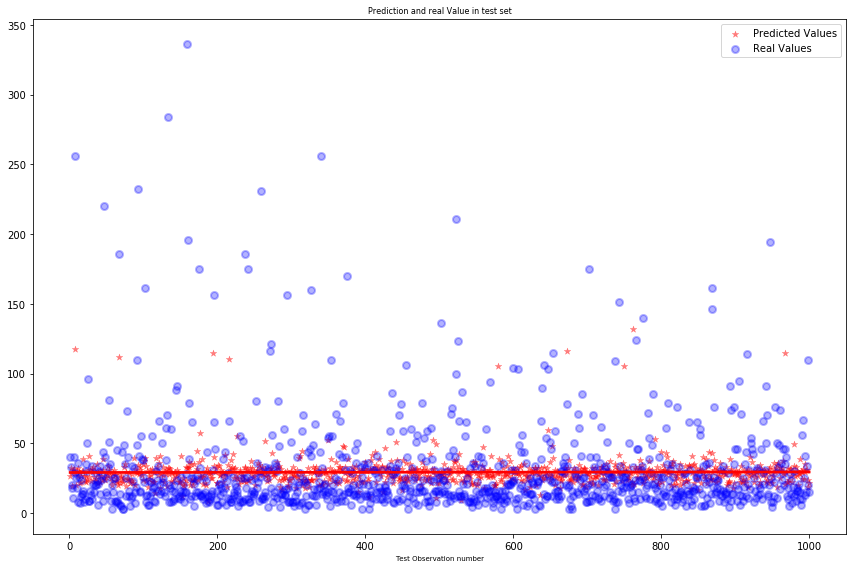

In [84]:
plot(y_testG[:1000],price_predictedLs[:1000])

        - Random Forest

In [85]:
def RfRegression(X_trainG, y_trainG):
    rf = RandomForestRegressor(bootstrap=True, max_depth=40, max_features='sqrt', min_samples_leaf=10,
                           n_estimators=250,oob_score=True, random_state=0)
    rf.fit(X_trainG, y_trainG)
    return rf

In [86]:
Rf_Model =RfRegression(X_trainG, y_trainG)

In [87]:
price_predictedRf = Rf_Model.predict(X_testG)

In [88]:
plot(y_testG[:1000],price_predictedRf[:1000])

        - AdaBoost :

In [89]:
gbr=GradientBoostingRegressor()
L=list(dfBag['category_main'].unique())
L.remove(np.nan)

L=L[::-1]
Final_R=pd.DataFrame(columns= ['y', 'y_pred'])
for i in (L):
    R=pd.DataFrame(columns= ['y', 'y_pred'])
    dfc=dfBag.copy()
    dfc=dfc[dfc['category_main']==i]
    x_train, x_test, y_train, y_test = train_test_split(dfc.drop(['price','name','category_name','category_sub2','category_sub1','item_description','category_main'],axis=1), dfc['price'], test_size=0.2)
    gbr.fit(x_train,y_train)
    predictions = gbr.predict(x_test)
    R['y']=y_test
    R['y_pred']=predictions
    Final_R=Final_R.append(R)

In [90]:
plot(Final_R['y'][:1000],Final_R['y_pred'][:1000])

        - Our Combined Regressor : Based on Sklearn Regressor, weights and Sub-Categeories 

    - Performances 

In [99]:
print("Performance for :")
print("linear Model")
perfMetrics(y_testG,price_predicted)
print("R2_Score "+str((r2_score(y_testG,price_predicted))))
print("------------------")
print("Ridge Model")
perfMetrics(y_testG,price_predictedRd)
print("R2_Score "+str((r2_score(y_testG,price_predictedRd))))
print("------------------")
print("lasso Model")
perfMetrics(y_testG,price_predictedLs)
print("R2_Score "+str((r2_score(y_testG,price_predictedLs))))
print("------------------")
print("RandomForest Model")
perfMetrics(y_testG,price_predictedRf)
print("R2_Score "+str((r2_score(y_testG,price_predictedRf))))
print("------------------")
print("adaBoost Model")
perfMetrics(Final_R['y'],Final_R['y_pred'])
print("R2_Score "+str((r2_score(Final_R['y'],Final_R['y_pred']))))

Performance for :
linear Model
MAE: 19.7355417769
MSE: 1568.3457013
RMSE: 39.6023446439
R2_Score 0.104437319829
------------------
Ridge Model
MAE: 19.9872221426
MSE: 1618.16009416
RMSE: 40.2263606875
R2_Score 0.0759921172504
------------------
lasso Model
MAE: 19.736658681
MSE: 1568.61158896
RMSE: 39.6057014704
R2_Score 0.104285491652
------------------
RandomForest Model
MAE: 19.4361150083
MSE: 1511.91750334
RMSE: 38.8833833834
R2_Score 0.136659162345
------------------
adaBoost Model
MAE: 15.5899280934
MSE: 1001.18382738
RMSE: 31.6414890197
R2_Score 0.386080371165


In [95]:
from sklearn.metrics import r2_score
print(r2_score(Final_R['y'],Final_R['y_pred']))  
print(r2_score(y_testG,price_predictedLs) ) 
print(r2_score(y_testG,price_predicted)  )
print(r2_score(y_testG,price_predictedRf))  
print(r2_score(y_testG,price_predictedRd))


0.386080371165
0.104285491652
0.104437319829
0.136659162345
0.0759921172504


    - cell to hide warnings -- Beautify 

In [92]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')